Author: Muhammad Rafif Dwidayatama (rafifdwida@gmail.com) - December, 2023.

# Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

In [3]:
customer = pd.read_csv ('dataset/olist_customers_dataset.csv', sep=',')
geo = pd.read_csv ('dataset/olist_geolocation_dataset.csv', sep=',')
items = pd.read_csv ('dataset/olist_order_items_dataset.csv', sep=',')
payments = pd.read_csv ('dataset/olist_order_payments_dataset.csv', sep=',')
reviews = pd.read_csv ('dataset/olist_order_reviews_dataset.csv', sep=',')
orders = pd.read_csv ('dataset/olist_orders_dataset.csv', sep=',')
products = pd.read_csv ('dataset/olist_products_dataset.csv', sep=',')
sellers = pd.read_csv ('dataset/olist_sellers_dataset.csv', sep=',')
name = pd.read_csv ('dataset/product_category_name_translation.csv', sep=',')

# Understanding The Data

## Univariate Analysis

### Customer Data

In [11]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [20]:
customer.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Pada dataset tidak terdapat data yang kosong, jadi tidak perlu dibersihkan atau diisi

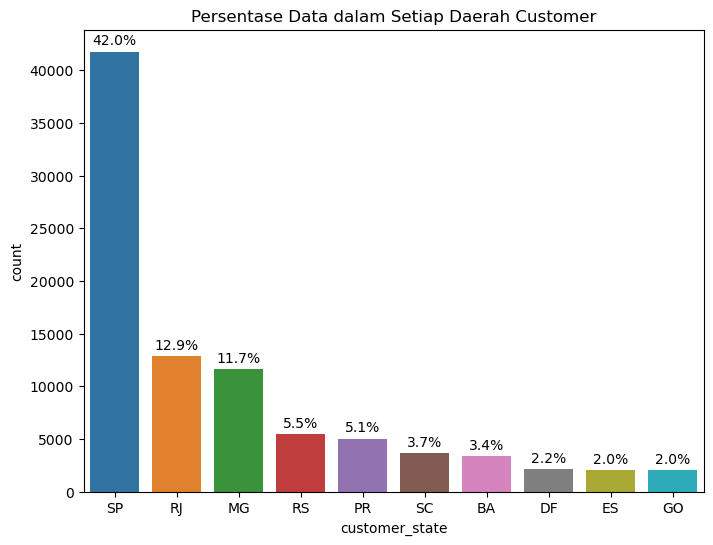

In [26]:
counts = customer['customer_state'].value_counts()

# Mengurutkan nilai counts secara menurun
counts = counts.head(10)

# Membuat grafik countplot dengan persentase dan urutan yang telah diurutkan
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=customer, x='customer_state', order=counts.index)
total = len(customer['customer_state'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', textcoords='offset points', xytext=(0,5))

# Menampilkan judul
plt.title('Persentase Data dalam Setiap Daerah Customer')

# Menampilkan grafik
plt.show()

Pada daerah SP, cukup terlihat timpang dengan yang lainnya yang signifikan dengan 42% pada SP, kedua dan ketiga dengan nilai 12,9% dan 11,7%. Daerah lain yang tidak ditampilkan pada grafik memiliki nilai dibawah dari 2%

In [5]:
#Top 10 cities with their value counts
customer.customer_city.value_counts().sort_values(ascending=False)[:10]

sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_city, dtype: int64

### Items Data

In [12]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900000,13.290000
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.900000,19.930000
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.000000,17.870000
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.990000,12.790000
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.900000,18.140000


In [7]:
items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [8]:
print('Number of sellers :',items.seller_id.unique().shape[0])
print('Number of unique products are : ',items.product_id.unique().shape[0])

Number of sellers : 3095
Number of unique products are :  32951


Terdapat 3095 penjual dengan 32951 produk yang bermacam-macam 

In [9]:
items.price.describe()

count   112650.000000
mean       120.653739
std        183.633928
min          0.850000
25%         39.900000
50%         74.990000
75%        134.900000
max       6735.000000
Name: price, dtype: float64

terlihat bahwa nilai pada 25%,50%,75% sebesar 39.9, 74.99, 134.9. Sedangkan nilai max dan min sebesar 6735 dan 0.85. Berarti nilai dari min hingga 75% itu memiliki rentang yang cukup dekat, tetapi terpaut jauh antara 75% dan max dengan data yang tidak lebih banyak antara min ke 25%.

### Payments Data

In [10]:
payments.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
48491,98a2198fe7cdc41447b479d9220f0371,1,credit_card,5,418.040000
97181,a57913442118de617c1687f936b0a986,1,credit_card,9,232.120000
33963,eae87b24ee716eaeed2b3b67eab5e244,1,credit_card,1,58.130000
30522,966035ca31422485dcb5d5a70af4080f,1,credit_card,2,116.850000
71816,7a3d6ddc737bc4e0f556c9c47f15e7a6,1,boleto,1,156.830000
44343,765e82006189100419015233bf26be8a,1,credit_card,6,59.990000
2284,384588323436f6d2ae1474b58844eccd,1,credit_card,1,76.650000
4640,f5e8dd6f3cfc89bc152991875437aaa2,1,credit_card,6,61.180000
12153,dfc7b55ee482374556356b94afc9b841,1,credit_card,1,81.430000
64477,7e843e422a53b8895473162e13c2b70f,1,credit_card,1,95.670000


In [5]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

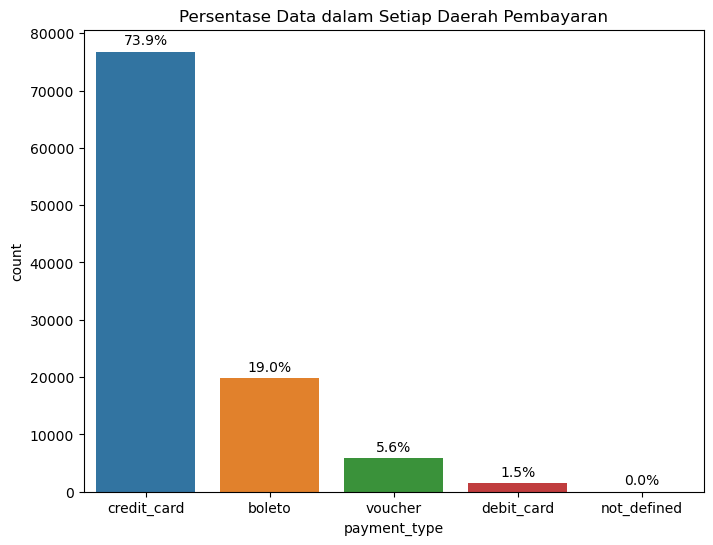

In [9]:
counts = payments['payment_type'].value_counts()

# Mengurutkan nilai counts secara menurun
counts = counts.head(10)

# Membuat grafik countplot dengan persentase dan urutan yang telah diurutkan
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=payments, x='payment_type', order=counts.index)
total = len(payments['payment_type'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', textcoords='offset points', xytext=(0,5))

# Menampilkan judul
plt.title('Persentase Data dalam Setiap Pembayaran')

# Menampilkan grafik
plt.show()

Pembayaran yang paling sering dilakukan oleh customer adalah Credit card sebesar 73.9% atau sekitar kurang lebih 75000 customer dari seluruh customer pada data. Dan selanjutnya ada Boleta sebesar 19% atau sekitar kurang lebih 20000 dari seluruh customer pada data.

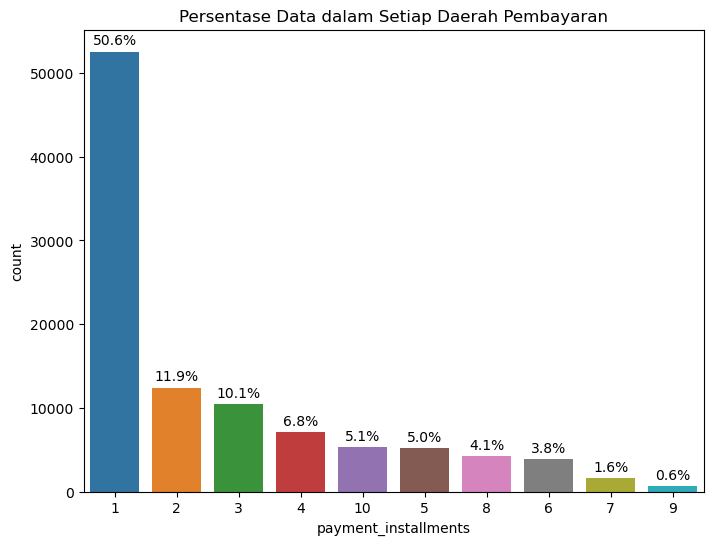

In [10]:
counts = payments['payment_installments'].value_counts()

# Mengurutkan nilai counts secara menurun
counts = counts.head(10)

# Membuat grafik countplot dengan persentase dan urutan yang telah diurutkan
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=payments, x='payment_installments', order=counts.index)
total = len(payments['payment_installments'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', textcoords='offset points', xytext=(0,5))

# Menampilkan judul
plt.title('Persentase Data dalam Setiap Daerah Pembayaran')

# Menampilkan grafik
plt.show()

Angsuran Pembayaran yang sering dilakukan oleh customer adalah cash atau pembayaran 1 kali yang sebesar 50.6% pada seluruh customer pada data. Dan pada grafik hanya menampilkan 10 kategori terbanyak dari seluruh kategori yang ada yang menandakan bahwa kategori yang tidak ditampilkan hanya sebesar di bawah  0.6%

### Reviews Data

In [11]:
reviews.tail()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49


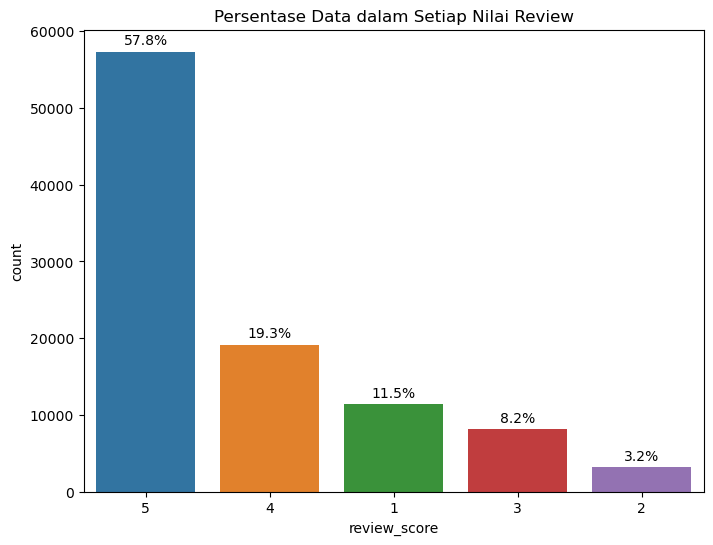

In [6]:
counts = reviews['review_score'].value_counts()

# Mengurutkan nilai counts secara menurun
counts = counts.head(10)

# Membuat grafik countplot dengan persentase dan urutan yang telah diurutkan
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=reviews, x='review_score', order=counts.index)
total = len(reviews['review_score'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', textcoords='offset points', xytext=(0,5))

# Menampilkan judul
plt.title('Persentase Data dalam Setiap Nilai Review')

# Menampilkan grafik
plt.show()

Customer memberikan nilai score dengan kategori terbanyak pada nilai 5 sebesar 57.8% dengan sekitar kurang lebih 55000 customer. Namun, terlihat nilai score 1 berada di ketiga sebesar 11.5% atau sekitar 10000 customer setelah nilai score 4 sebesar 19.3% atau hampir 20000 customer. Ini berarti menandakan bahwa ada beberapa hal dari penjual yang sangat tidak disukai oleh 11.5% customer yang ada

In [7]:
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

- Pada kolom `review_comment_title` dan `review_comment_message` memiliki banyak data yang kosong sebesar 59247 dan 87656 dari 99224 data. Ini cukup wajar karena memang sebagian besar pelanggan tidak suka untuk menulis ulasan.

- Karena persentase data yang kosong lebih dari 30% (yaitu sebesar 58,7% dan 88,3%). Jadi, lebih baik dihapus kedua kolom tersebut.


### Orders Data

In [16]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


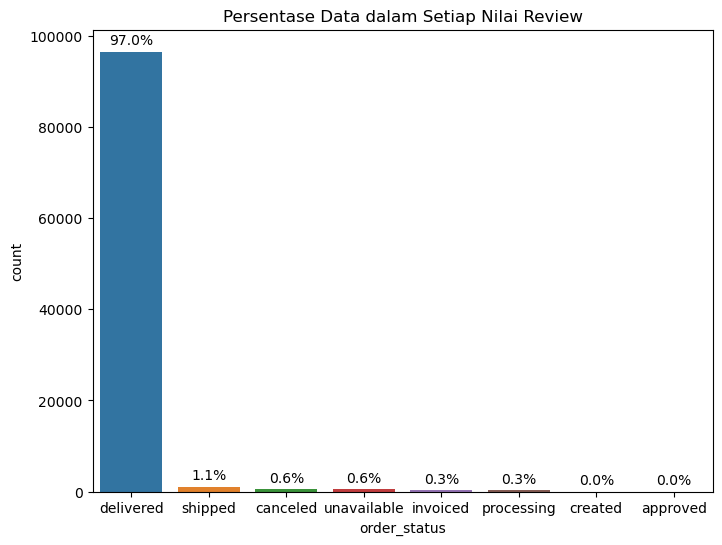

In [12]:
counts = orders['order_status'].value_counts()

# Mengurutkan nilai counts secara menurun
counts = counts.head(10)

# Membuat grafik countplot dengan persentase dan urutan yang telah diurutkan
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=orders, x='order_status', order=counts.index)
total = len(orders['order_status'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', textcoords='offset points', xytext=(0,5))

# Menampilkan judul
plt.title('Persentase Data dalam Setiap Nilai Review')

# Menampilkan grafik
plt.show()

In [5]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

- Hampir 97% pesanan ditandai sebagai `delivered`, beberapa `canceled`, `approved`, dll. Perhatikan bahwa keadaan seperti itu sangat jarang terjadi dan ditampilkan di data juga, jadi fitur ini tidak ada gunanya dan bisa diabaikan

- Ada beberapa pesanan yang memiliki order_delivered_carrier_date yang hilang, order_delivered_customer_date dan sangat sedikit yang memiliki order_approved_at yang hilang.

### Products Data

In [15]:
products.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
25837,a514c9314e6d8af09721786a8ab34c7e,papelaria,57.000000,502.000000,2.000000,150.000000,18.000000,2.000000,11.000000
25975,fc8b21a0fa8ae9622a79bd557b380961,audio,60.000000,905.000000,2.000000,350.000000,16.000000,16.000000,11.000000
9899,7899001d8d8933d11d0f18ec5943f79e,NaN,NaN,NaN,NaN,1000.000000,29.000000,11.000000,14.000000
2503,c26592bb29cba57872a926be4835a246,fashion_bolsas_e_acessorios,37.000000,293.000000,3.000000,100.000000,16.000000,6.000000,20.000000
20203,1c45430f3f3063bdb54d28e87824ed34,cama_mesa_banho,56.000000,729.000000,1.000000,5200.000000,20.000000,30.000000,30.000000
22122,103aed057190376889bc9e796affa24e,bebes,34.000000,1355.000000,4.000000,332.000000,16.000000,16.000000,15.000000
30261,5c0b5ea8a3b6a1ac9d0e5c58e97ba24c,esporte_lazer,42.000000,141.000000,1.000000,250.000000,20.000000,20.000000,20.000000
18947,bf4ff42133c7bced3bda24a521a5e12f,utilidades_domesticas,60.000000,446.000000,5.000000,11550.000000,45.000000,28.000000,45.000000
9462,068831628652b27ae554b8a66ca6adcf,moveis_decoracao,57.000000,499.000000,3.000000,5400.000000,34.000000,50.000000,34.000000
23467,522f7a0f8944ac27a74436210e112821,automotivo,54.000000,297.000000,3.000000,2100.000000,24.000000,2.000000,17.000000


In [6]:
products.shape

(32951, 9)

In [17]:
products.rename(columns = {'product_name_lenght':'product_name_length',
                       'product_description_lenght':'product_description_length'},inplace=True)

Text(0.5, 0, 'product_description_length')

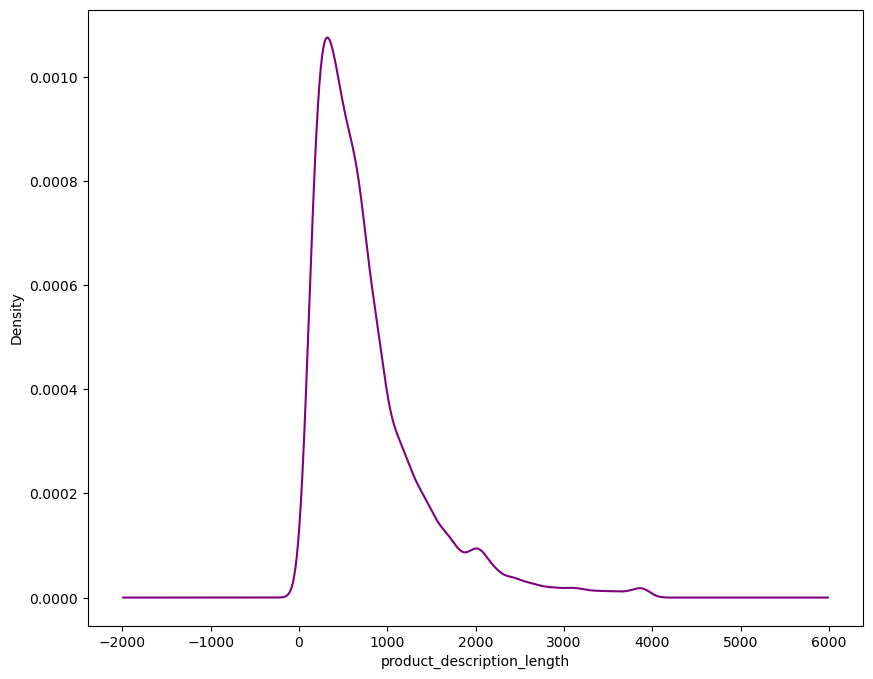

In [18]:
products.product_description_length.plot(kind='density',figsize=(10,8),color= 'purple')
plt.xlabel('product_description_length')

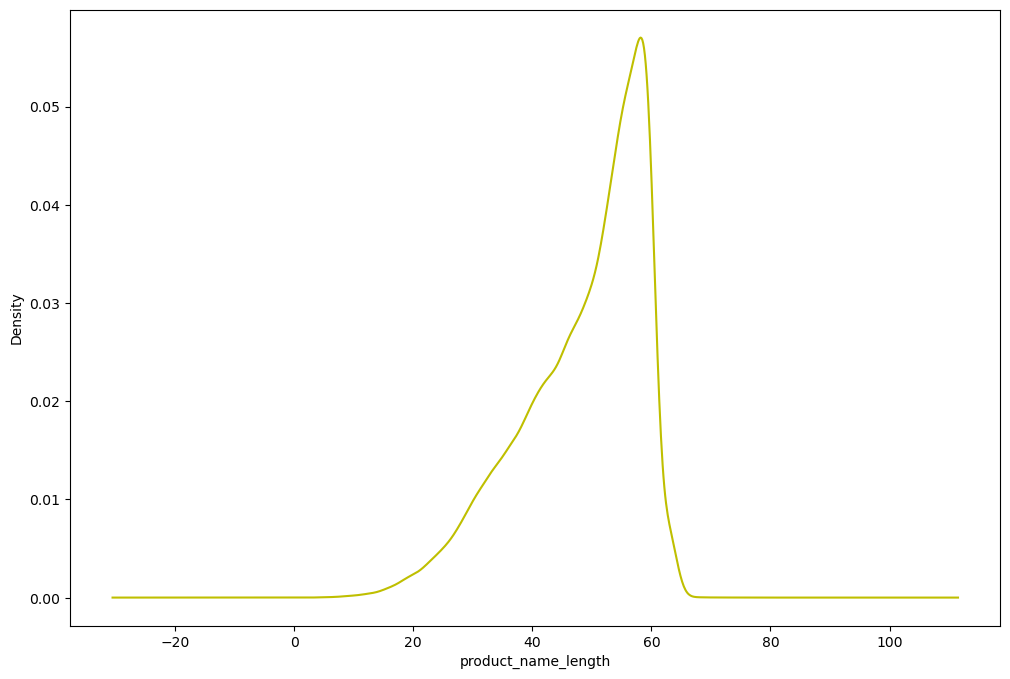

In [19]:
d = products.product_name_length

d.plot(kind='kde',figsize=(12,8),color= 'y')
plt.xlabel('product_name_length')
plt.show()

- Plot densitas untuk panjang_nama_produk padat di sekitar (20-60) dan panjang deskripsi_produk di sekitar (0-2000)

- CDF di atas menunjukkan bahwa sekitar 92% produk memiliki panjang deskripsi_produk kurang dari atau sama dengan 2000.

- PDF menunjukkan bahwa probabilitas untuk mendapatkan product_description_length 500-100 memiliki probabilitas maksimum.

### Sellers Data

In [17]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


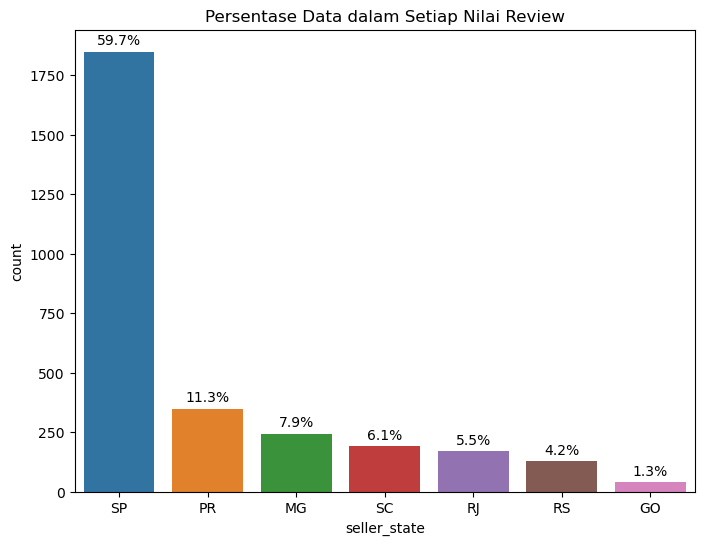

In [8]:
counts = sellers['seller_state'].value_counts()

# Mengurutkan nilai counts secara menurun
counts = counts.head(7)

# Membuat grafik countplot dengan persentase dan urutan yang telah diurutkan
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=sellers, x='seller_state', order=counts.index)
total = len(sellers['seller_state'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', textcoords='offset points', xytext=(0,5))

# Menampilkan judul
plt.title('Persentase Data dalam Setiap Nilai Review')

# Menampilkan grafik
plt.show()

Penjual terbanyak ada pada daerah `SP` dengan lebih dari 1750 penjual dengan persentase 59,7%. Dan dilanjut di daerah `PR` dan `MG` dengan sekitar 250 - 400 penjual dengan persentase 11,3% dan 7,9%.

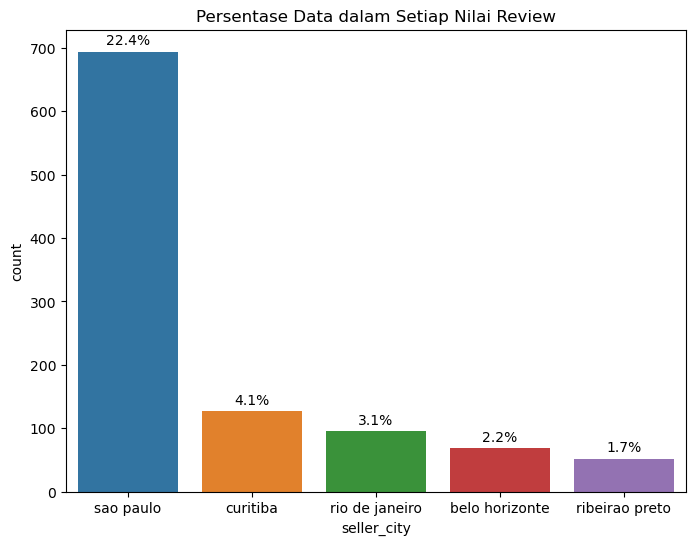

In [10]:
counts = sellers['seller_city'].value_counts()

# Mengurutkan nilai counts secara menurun
counts = counts.head()

# Membuat grafik countplot dengan persentase dan urutan yang telah diurutkan
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=sellers, x='seller_city', order=counts.index)
total = len(sellers['seller_city'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', textcoords='offset points', xytext=(0,5))

# Menampilkan judul
plt.title('Persentase Data dalam Setiap Nilai Review')

# Menampilkan grafik
plt.show()

Penjual terbanyak ada pada kota `Sao Paulo` dengan hampir 700 penjual dengan persentase 22.4%. Dan dilanjut di daerah `Curitiba` dan `Rio de Janeiro` dengan sekitar 100 - 150 penjual dengan persentase 4,1% dan 3,1%.

**Observasi**

- Penjual pada tiap daerah cukup terlalu jauh antara `SP` dengan daerah lainnya. Yang menandakan bahwa peminat pada daerah `SP` cukup banyak dari pada daerah lainnya. 

- Penjual pada tiap kota cukup terlalu jauh antara kota `Sao Paulo` dengan kota lainnya. Yang menandakan bahwa peminat pada daerah `Sao Paulo` cukup banyak dari pada daerah lainnya.

- Solusi yang dapat dicoba yaitu buat promo seperti beli 2 gratis 1 atau promo diskon, atau coba untuk mengecek barang di tempat tersebut apakah terjadi kerusakan saat sudah sampai ditempat atau saat diperjalanan agar bisa diperbaiki dan meningkatkan penjualan.

### Name and Geo Data

In [18]:
name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [19]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


# Data Cleaning and Preprocessing

Mengganti nama semua prefix `zip_code_prefix` agar nama tersebut menjadi umum di semua tabel untuk melakukan join tabel

In [4]:
geo.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'},inplace=True)
customer.rename(columns={'customer_zip_code_prefix':'zip_code_prefix'},inplace=True)
sellers.rename(columns={'seller_zip_code_prefix':'zip_code_prefix'},inplace=True)

Menyimpan awalan zip code yang unik sehingga dapat digunakan sebagai kunci untuk bergabung dengan tabel

In [5]:
#keeping only the unique zip code prefix so that it can act as key to join tables
geo.drop_duplicates(subset='zip_code_prefix',inplace=True)
geo.shape

(19015, 5)

Menyatukan seluruh data yang berhubungan dengan **customer**. Dan melakukan penggabungan left outer join karena membutuhkan setiap alamat berbasis geografis yang terkait dengan customer

In [6]:
A = pd.merge(orders,reviews,on='order_id')
A = pd.merge(A,payments,on='order_id')
A = pd.merge(A,customer,on='customer_id')
A = pd.merge(A,geo,how='left',on='zip_code_prefix')
A.shape

(103677, 26)

In [16]:
A.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.120000,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.000000,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.590000,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.460000,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1,credit_card,3,179.120000,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,vianopolis,GO


Menyatukan seluruh data yang berhubungan dengan **seller**. Dan melakukan penggabungan left outer join karena membutuhkan setiap alamat berbasis geografis yang terkait dengan seller

In [7]:
#merging all seller related data

B = pd.merge(items,products,on='product_id')
B = pd.merge(B,sellers,on='seller_id')
B = pd.merge(B,name,on='product_category_name')
#peforming left outer join as we need every geo based address related to seller
B = pd.merge(B,geo,how='left',on='zip_code_prefix')
B.shape

(111023, 23)

In [18]:
B.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,zip_code_prefix,seller_city,seller_state,product_category_name_english,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900000,13.290000,cool_stuff,58.000000,598.000000,4.000000,650.000000,28.000000,9.000000,14.000000,27277,volta redonda,SP,cool_stuff,-22.498183,-44.123614,volta redonda,RJ
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.900000,17.960000,cool_stuff,58.000000,598.000000,4.000000,650.000000,28.000000,9.000000,14.000000,27277,volta redonda,SP,cool_stuff,-22.498183,-44.123614,volta redonda,RJ
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.900000,18.330000,cool_stuff,58.000000,598.000000,4.000000,650.000000,28.000000,9.000000,14.000000,27277,volta redonda,SP,cool_stuff,-22.498183,-44.123614,volta redonda,RJ
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.900000,16.170000,cool_stuff,58.000000,598.000000,4.000000,650.000000,28.000000,9.000000,14.000000,27277,volta redonda,SP,cool_stuff,-22.498183,-44.123614,volta redonda,RJ
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.900000,13.290000,cool_stuff,58.000000,598.000000,4.000000,650.000000,28.000000,9.000000,14.000000,27277,volta redonda,SP,cool_stuff,-22.498183,-44.123614,volta redonda,RJ


In [8]:
df = pd.merge(A,B,on='order_id')
df.shape

(115609, 48)

In [14]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'zip_code_prefix_x', 'customer_city', 'customer_state',
       'geolocation_lat_x', 'geolocation_lng_x', 'geolocation_city_x',
       'geolocation_state_x', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'zip_code_prefix_y', 'seller_city', 'seller_state',
    

In [20]:
null_columns = df.columns[df.isnull().any()]

# Menampilkan nilai null dalam kolom yang mengandung null
for col in null_columns:
    print(f"{col:<30} {df[col].isnull().sum()}")

order_approved_at              14
order_delivered_carrier_date   1195
order_delivered_customer_date  2400
review_comment_title           101808
review_comment_message         66703
geolocation_lat_x              310
geolocation_lng_x              310
geolocation_city_x             310
geolocation_state_x            310
product_weight_g               1
product_length_cm              1
product_height_cm              1
product_width_cm               1
geolocation_lat_y              263
geolocation_lng_y              263
geolocation_city_y             263
geolocation_state_y            263


In [9]:
print(df.shape[0])
df[df['order_status'] != 'delivered'].shape[0]

115609


2399

In [22]:
100 - round((2399/115609)*100,3)

97.925

**Pengamatan**

1. Ada banyak fitur yang juga memiliki entri nol/kosong, tetapi proporsinya kurang dari 30%, jadi kita bisa menghapus semua baris tersebut.

2. Selain itu, kami memiliki nama kategori produk dalam bahasa yang berbeda, jadi kami cukup mengganti nama versi bahasa Inggris dari nama kategori menjadi category_name dan menghapus yang lainnya.

3. Untuk menambahkan hal ini, dapat menghapus informasi yang sangat rinci tentang produk yaitu `product_description_lenght`, `product_name_lenght`, `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`, karena mereka tidak memutuskan apakah pelanggan akan menyukainya atau tidak.

4. Satu-satunya fitur di bagian produk yang dapat berguna adalah jumlah foto yang dimiliki produk, jika memiliki banyak foto, pelanggan pelanggan sangat menyadari bagaimana produk terlihat dari semua cara yang mungkin dan lebih yakin untuk membelinya, sehingga meningkatkan peluang untuk mendapatkan peringkat positif.

5. Pada catatan yang sama, panjang `product_description` juga dapat bertindak agak berguna, karena jika deskripsi produk rinci dan panjang, pelanggan kemungkinan besar akan mengetahui inti dari produk tersebut sehingga meningkatkan probabilitas peringkat yang tinggi.

6. Tidak terlalu membutuhkan info `Latitudinal` dan `Longitudinal`, `seller_city` (seller state sudah cukup). Jadi kolom `Latitudinal` dan `Longitudinal` akan dihapus.

7. Order_approved_at adalah fitur berbasis datetime yang cukup tidak berguna, karena dalam hampir semua kasus pesanan disetujui dalam beberapa menit atau jam selama persedian memang masih ada. Jika pun tidak ada persediaannya, pasti tidak akan bisa dipesan barang tersebut.

8. Menghapus ulasan produk dan judul ulasan, tidak ada gunanya lagi id ulasan sekarang.

In [9]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,zip_code_prefix_x,customer_city,customer_state,geolocation_lat_x,geolocation_lng_x,geolocation_city_x,geolocation_state_x,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,zip_code_prefix_y,seller_city,seller_state,product_category_name_english,geolocation_lat_y,geolocation_lng_y,geolocation_city_y,geolocation_state_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.120000,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.990000,8.720000,utilidades_domesticas,40.000000,268.000000,4.000000,500.000000,19.000000,8.000000,13.000000,9350,maua,SP,housewares,-23.680114,-46.452454,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.000000,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.990000,8.720000,utilidades_domesticas,40.000000,268.000000,4.000000,500.000000,19.000000,8.000000,13.000000,9350,maua,SP,housewares,-23.680114,-46.452454,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.590000,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.990000,8.720000,utilidades_domesticas,40.000000,268.000000,4.000000,500.000000,19.000000,8.000000,13.000000,9350,maua,SP,housewares,-23.680114,-46.452454,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.460000,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.700000,22.760000,perfumaria,29.000000,178.000000,1.000000,400.000000,19.000000,13.000000,19.000000,31570,belo horizonte,SP,perfumery,-19.810119,-43.984727,belo horizonte,MG
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1,credit_card,3,179.120000,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-1

In [55]:
df.shape

(115609, 48)

In [10]:
#removing some mis filled data
df = df[df['geolocation_state_y'] == df['seller_state']]

#list of useless feature
useless_features = ['review_comment_title','review_comment_message','product_category_name','product_weight_g','review_creation_date',
                    'product_length_cm','product_height_cm','product_width_cm','seller_city','review_answer_timestamp',
                   'geolocation_lat_y','geolocation_lng_y','geolocation_city_y','geolocation_state_y','review_id','order_approved_at','order_status',
                   'order_id','customer_id','order_item_id','geolocation_lat_x',
                   'geolocation_lng_x','geolocation_city_x','geolocation_state_x']
print('Number of useless features as of now are : ',len(useless_features))

df.drop(useless_features,axis=1,inplace=True)

df.rename(columns = {'product_category_name_english':'product_category_name','zip_code_prefix_x':'zipCode_prefix_cust',
                      'zip_code_prefix_y':'zipCode_prefix_seller'},inplace=True)




Number of useless features as of now are :  24


In [11]:
prev_df = df.shape[0]
df.dropna(how='any',inplace=True)

current_df = df.shape[0]
df.isnull().values.any()
print(df.shape)
print('Only {}% of data got removed'.format(round(((prev_df - current_df)/prev_df)*100,2)))

(112296, 24)
Only 2.08% of data got removed


In [11]:
df.columns

Index(['order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'zipCode_prefix_cust', 'customer_city', 'customer_state', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'zipCode_prefix_seller', 'seller_state',
       'product_category_name'],
      dtype='object')

# EDA

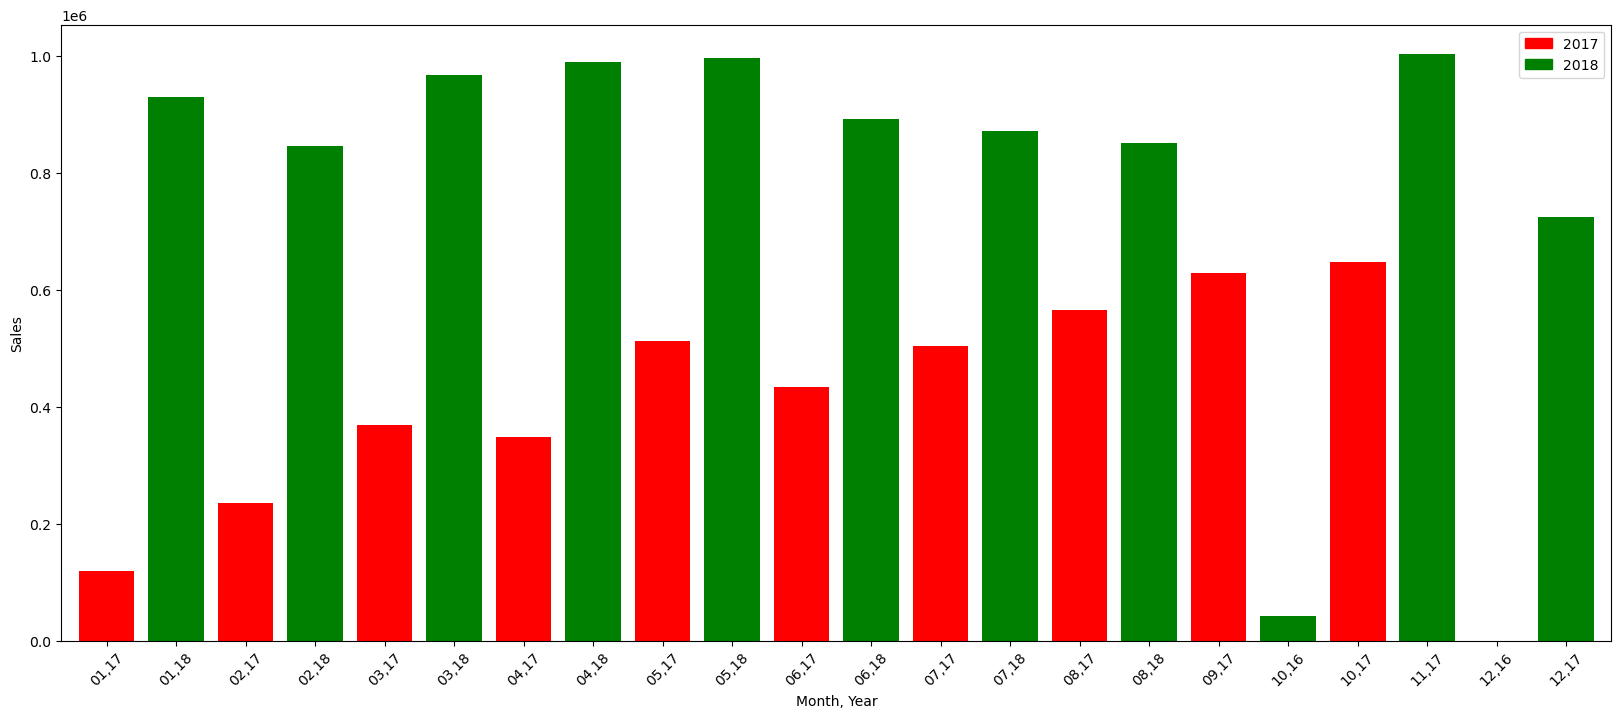

In [58]:
# Understanding the growth of Olist as an ecommerce company from the given data range
import matplotlib.patches as mpatches

# Konversi kolom 'order_purchase_timestamp' ke tipe data datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Mengelompokkan data berdasarkan bulan dan tahun dari kolom 'order_purchase_timestamp'
monthly_sales_data = df.groupby(df['order_purchase_timestamp'].dt.strftime('%m,%y'))['price'].sum().plot(
    kind='bar', figsize=(20, 8), color=['r', 'g'], width=0.8)  # Menggunakan kind='line' untuk diagram garis
plt.ylabel('Sales')

# Menambahkan legenda
red_patch = mpatches.Patch(color='red', label='2017')
green_patch = mpatches.Patch(color='green', label='2018')
plt.legend(handles=[red_patch, green_patch])

plt.xlabel('Month, Year')

# Memutar label sumbu x sebesar 45 derajat
plt.xticks(rotation=45)
plt.show()


Pejualan pada tahun 2018 terlihat cukup terlihat jauh bahkan hingga lebih dari 1,5x lipat daripada penjualan pada tahun 2017. Terlihat penjualan yang menurun drastis karena itu penjualann pada tahun 2016

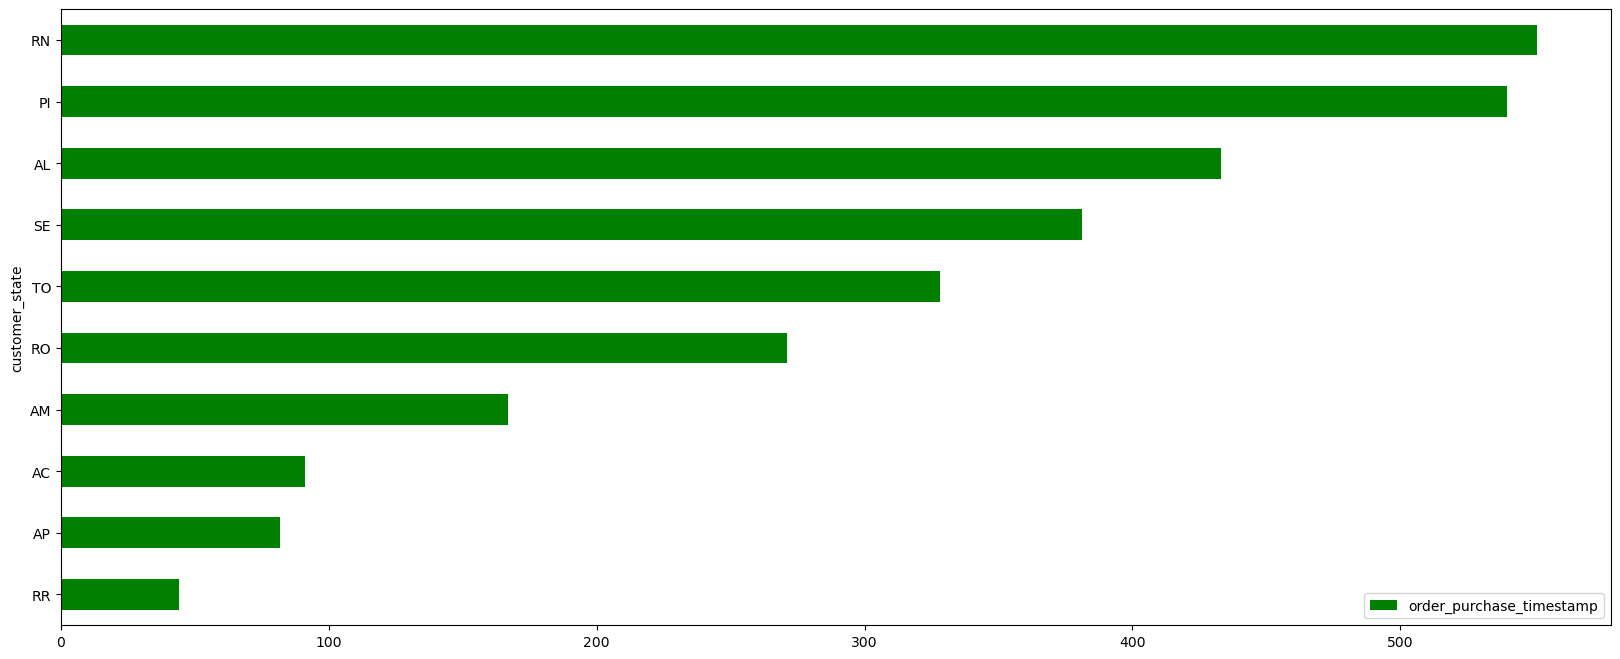

In [59]:
#top 10 states as per number of orders
df.groupby(df['customer_state'])['order_purchase_timestamp'].count().sort_values()[:10].plot(kind='barh',figsize=(20,8),color='green')
plt.legend()
plt.show()

Transaksi terbanyak ada daerah `RN`, dan disusul dengan cukup dekat dari daerah `PI` yang kedua dearah tersebut telah melakukan lebih dari 500 transaksi, dan di selanjutnya ada dari daerah `AL` dengan sekitar 400-450 transaksi

In [60]:
print('Total unique category are ',df.product_category_name.unique().shape[0])

Total unique category are  71


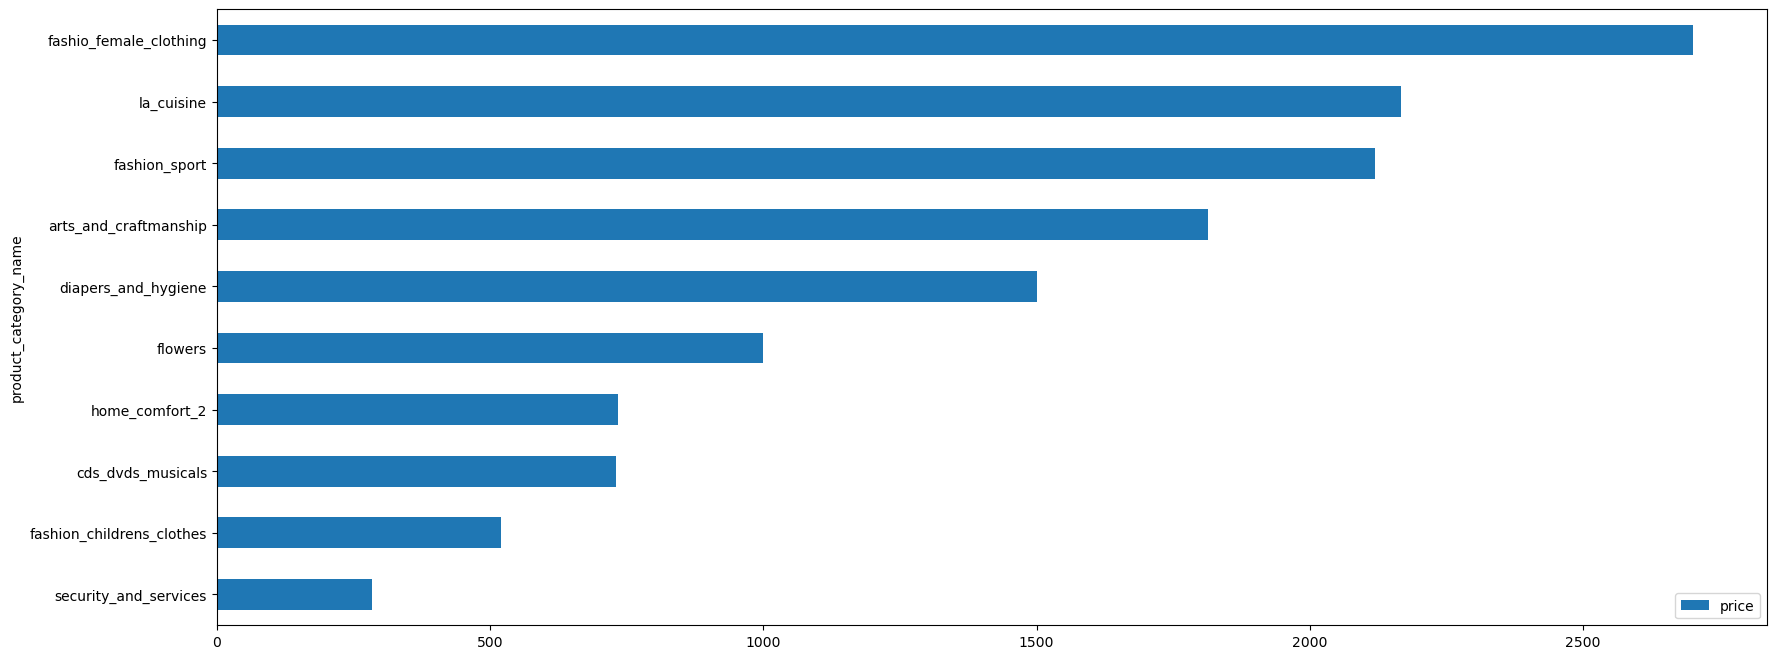

In [61]:
#category wise sales with their rating(top 20)
df.groupby(df['product_category_name'])['price'].sum().sort_values()[:10].plot(kind='barh',figsize=(20,8))
plt.legend()
plt.show()

Jenis barang yang paling banyak terjual ada pada `fashion_female_clothing` dengan lebih dari 2500 penjualan. Selanjutnya ada `la_cuisine` dengan antara 200-250 penjualan. Dan yang terakhir ada pada `fashion-sport` yang lumayan dekat dengan `la_cuisine` dengan 200-250 penjualan.

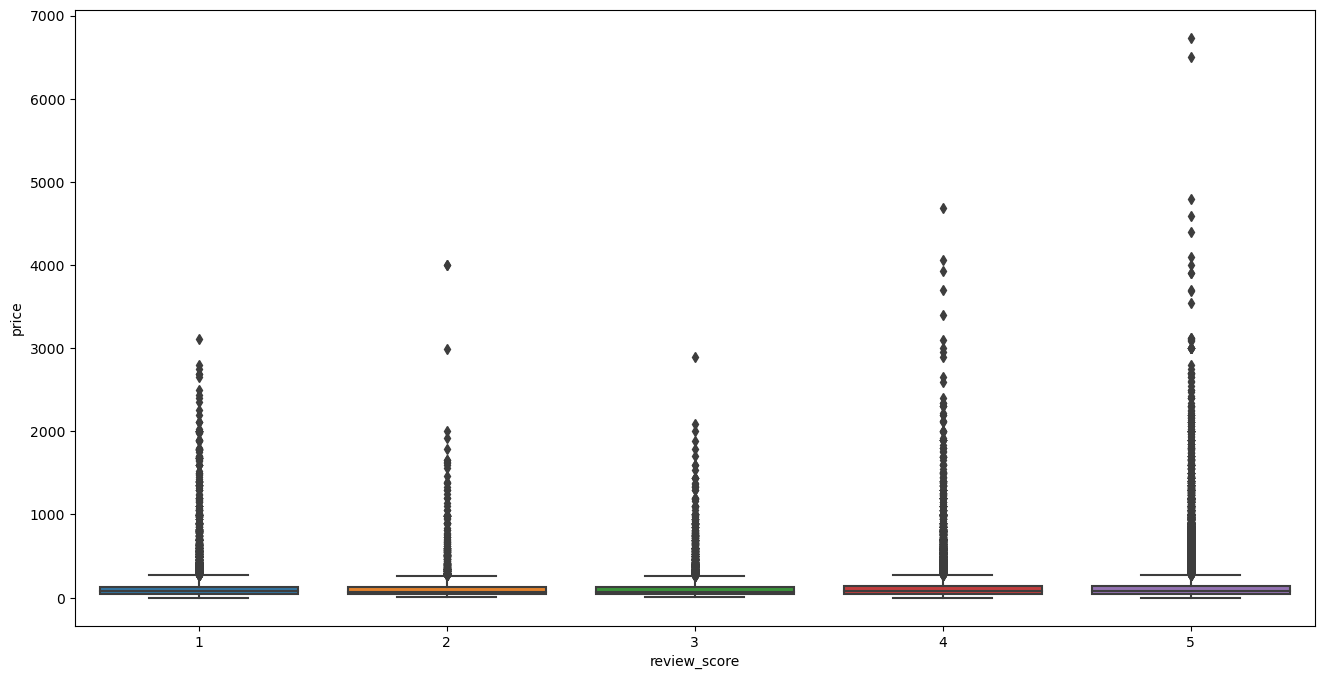

In [62]:
#Box plot for price with review score
plt.figure(figsize= (16,8))
sns.boxplot(x='review_score',y='price', data=df)
plt.show()

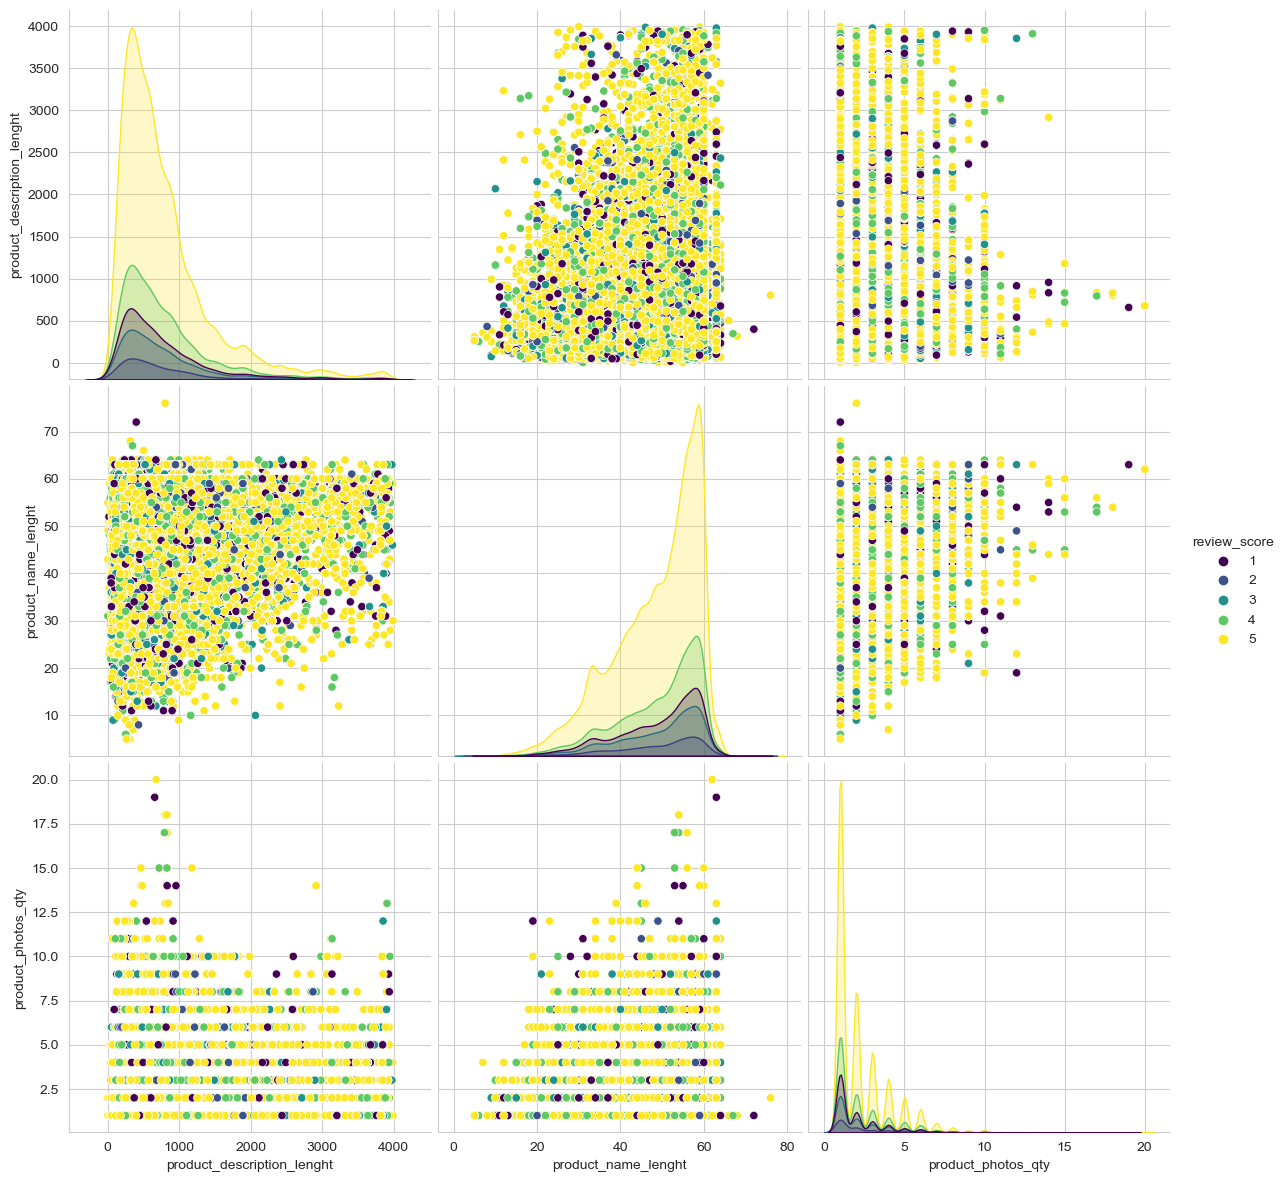

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil kolom yang akan divisualisasikan
d = df[['product_description_lenght', 'product_name_lenght', 'product_photos_qty', 'review_score']]

# Mengatur pairplot dengan lima warna berbeda untuk 'review_score'
sns.set_style("whitegrid")
sns.pairplot(d, hue="review_score", height=4, palette='viridis') # Anda dapat mengganti 'viridis' dengan palet warna lainnya
plt.show()


Pengamatan

1. Data sangat tidak seimbang, sehingga scatter plot mampu memisahkan kelas berdasarkan fitur yang dipilih

2. Titik dalam rentang (0-1500) `product_description_length` dan `product_name_length` dalam rentang (30-60) memiliki frekuensi yang tinggi dari 5 ulasan yang dinilai.

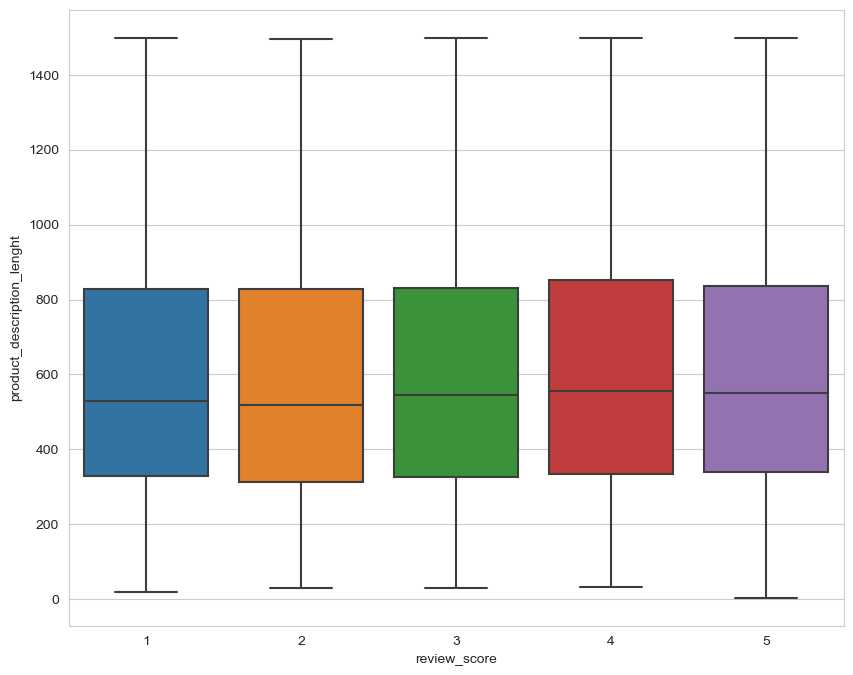

In [64]:
#taking only those points which was shown in the scatter plot
d = df[(df['product_name_lenght'] > 40) & (df['product_name_lenght'] < 60) & (df['product_description_lenght'] < 1500)]

plt.figure(figsize=(10,8))
sns.boxplot(x='review_score',y='product_description_lenght', data=d)
plt.show()

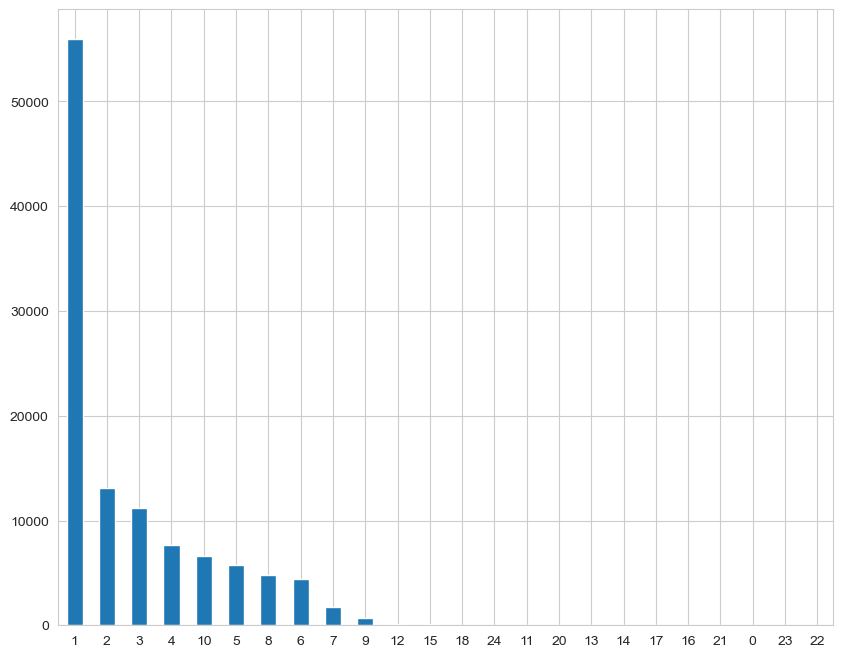

In [65]:

df['payment_installments'].value_counts().plot(kind='bar', figsize=(10, 8))
plt.xticks(rotation=0)  # Memutar teks label pada sumbu x sebesar 45 derajat
plt.show()


# Data Processing

In [12]:
# Ubah kolom 'order_purchase_timestamp' menjadi tipe data waktu terlebih dahulu jika belum
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Ubah kolom 'order_purchase_timestamp' menjadi tanggal
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].dt.date

# Ubah kolom 'order_estimated_delivery_date', 'order_delivered_customer_date', 'shipping_limit_date' menjadi tanggal
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date']).dt.date
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date']).dt.date
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date']).dt.date

type(df['order_delivered_customer_date'])


pandas.core.series.Series

In [30]:
df['order_estimated_delivery_date'].sample(5)

5319     2017-09-22
96414    2018-01-23
98041    2018-03-05
63985    2017-04-06
96992    2017-06-07
Name: order_estimated_delivery_date, dtype: object

In [27]:
df['shipping_limit_date'].sample(5)

9517     2017-10-05
65161    2018-03-11
64043    2018-05-28
34687    2018-01-05
40256    2017-11-29
Name: shipping_limit_date, dtype: object

In [13]:
#subtracting the order_purchase_time to rest time based feature and converting date time into string to remove the timestamp notation
df['delivery_days'] = df['order_delivered_customer_date'].sub(df['order_purchase_timestamp'],axis=0).astype(str)
df['estimated_days'] = df['order_estimated_delivery_date'].sub(df['order_purchase_timestamp'],axis=0).astype(str)
df['ships_in'] = df['shipping_limit_date'].sub(df['order_purchase_timestamp'],axis=0).astype(str)

In [81]:
df['delivery_days'].value_counts()

7     8690
8     8296
6     7715
9     7256
10    6798
11    6227
5     6107
12    5754
13    5287
4     5240
14    4759
3     4044
15    3873
2     3373
16    3280
17    2848
18    2651
19    2229
20    2107
21    1700
22    1630
23    1270
24    1136
25    1030
26     789
1      757
27     743
28     682
29     595
30     475
31     431
32     397
34     345
33     341
35     316
36     277
37     218
39     206
41     177
38     175
42     145
43     143
44     136
40     132
45     127
46     119
47      95
50      71
48      68
49      65
52      56
51      56
53      45
56      39
54      38
57      29
55      28
58      28
60      24
59      21
0        1
Name: delivery_days, dtype: int64

In [82]:
df['estimated_days'].value_counts()

22    6762
23    6356
24    6169
25    5899
20    5505
21    5503
26    5428
27    5131
28    4501
29    4237
19    3985
18    3594
30    3286
17    3280
31    3262
13    2976
16    2928
14    2887
33    2781
32    2755
34    2312
15    2287
35    2024
12    2014
36    1571
11    1394
10    1383
37    1305
38     980
39     951
8      941
9      758
40     742
41     709
42     527
43     456
44     367
5      367
7      354
6      328
45     310
46     296
47     234
3      201
49     189
48     176
51     161
50     159
4      157
53     156
55     149
52     122
56      97
59      71
57      71
54      70
58      49
60      27
Name: estimated_days, dtype: int64

In [14]:
#replacing the time stamp notation and converting type to int
df['delivery_days'] = df['delivery_days'].str.replace(" days","").astype(int)
df['estimated_days'] = df['estimated_days'].str.replace(" days","").astype(int)
df['ships_in'] = df['ships_in'].str.replace(" days","").astype(int)
df['arrival_time'] = (df['estimated_days'] - df['delivery_days']).apply(lambda x: 'Early/OnTime' if x > 0 else 'Late')

In [70]:
df['delivery_days'].sample(5)

36878    12
9332      5
41644    12
3654     10
59515     7
Name: delivery_days, dtype: int32

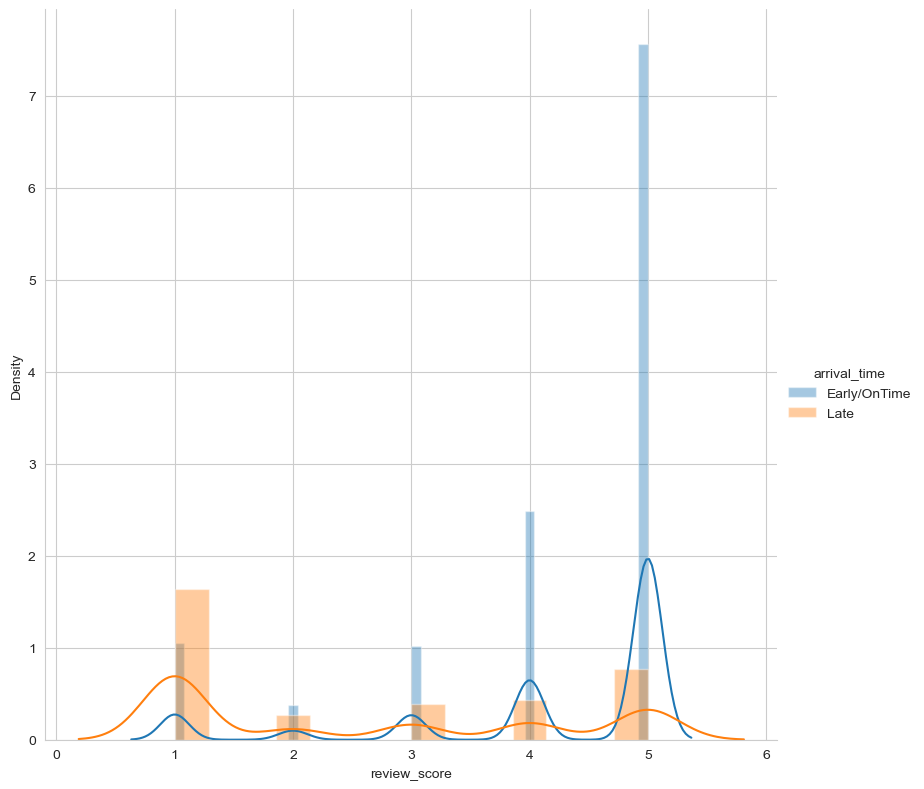

In [71]:
sns.FacetGrid(df, hue="arrival_time", height=8) \
   .map(sns.distplot, 'review_score') \
   .add_legend();
plt.show();

In [33]:
df['arrival_time'].value_counts()

Early/OnTime    103630
Late              8666
Name: arrival_time, dtype: int64

**Pengamatan**

1. Jelas dari plot di atas, pelanggan lebih cenderung memberikan nilai 4-5 jika produk tiba lebih awal atau tiba tepat waktu.

2. Karena waktu pengiriman sangat berpengaruh terhadap penilaian pelanggan, kami akan melakukan analisis lebih lanjut tentang waktu pengiriman.

In [15]:
#dropping exceptional delivery or possible outliers
ix = df[(df['delivery_days'] > 60) | (df['estimated_days'] > 60) | (df['ships_in'] > 60)].index
print(ix.shape)

print('Percentage of extermely late delivered packages in the dataset is: {}%'.format(round((((ix.shape[0])/(df.shape[0])))*100,3)))
#we can remove those outliers
df.drop(ix,inplace=True)

(606,)
Percentage of extermely late delivered packages in the dataset is: 0.54%


In [16]:
#binning and grouping delivery times into groups or classes

delivery_feedbacks = []
estimated_del_feedbacks = []
shipping_feedback = []
d_days = df.delivery_days.values.tolist()
est_days = df.estimated_days.values.tolist()
ship_days = df.ships_in.values.tolist()

#actural delivery days
for i in d_days:
    if i in range(0,8):
        delivery_feedbacks.append('Very_Fast')
    elif i in range(8,16):
        delivery_feedbacks.append('Fast')
    elif i in range(16,25):
        delivery_feedbacks.append('Neutral')
    elif i in range(25,40):
        delivery_feedbacks.append('Slow')
    elif i in range(40,61):
        delivery_feedbacks.append('Worst')

#estimated delivery days
for i in est_days:
    if i in range(0,8):
        estimated_del_feedbacks.append('Very_Fast')
    elif i in range(8,16):
        estimated_del_feedbacks.append('Fast')
    elif i in range(16,25):
        estimated_del_feedbacks.append('Neutral')
    elif i in range(25,40):
        estimated_del_feedbacks.append('Slow')
    elif i in range(40,61):
        estimated_del_feedbacks.append('Worst')

#estimated shipping days
for i in ship_days:
    if i in range(0,4):
        shipping_feedback.append('Very_Fast')
    elif i in range(4,8):
        shipping_feedback.append('Fast')
    elif i in range(8,16):
        shipping_feedback.append('Neutral')
    elif i in range(16,28):
        shipping_feedback.append('Slow')
    elif i in range(28,61):
        shipping_feedback.append('Worst')

#putting list values into the dataframe as feature
df['delivery_impression'] = delivery_feedbacks
df['estimated_del_impression'] = estimated_del_feedbacks
df['ship_impression'] = shipping_feedback

<Axes: ylabel='review_score'>

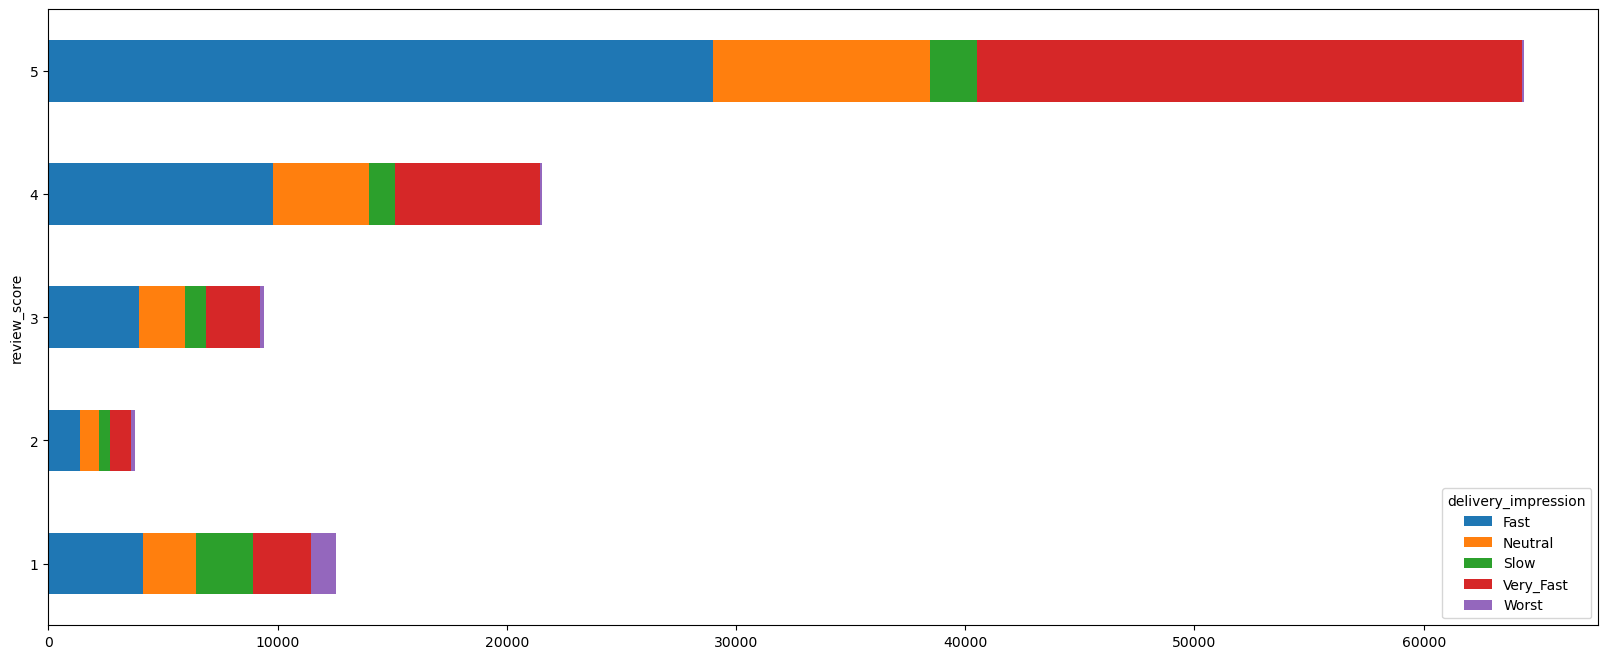

In [33]:
#Delivery Days histogram with review rating as hue
df_plot = df.groupby(['delivery_impression', 'review_score']).size().reset_index().pivot(columns='delivery_impression', index='review_score', values=0)
df_plot.plot(kind='barh',stacked=True,figsize=(20,8))

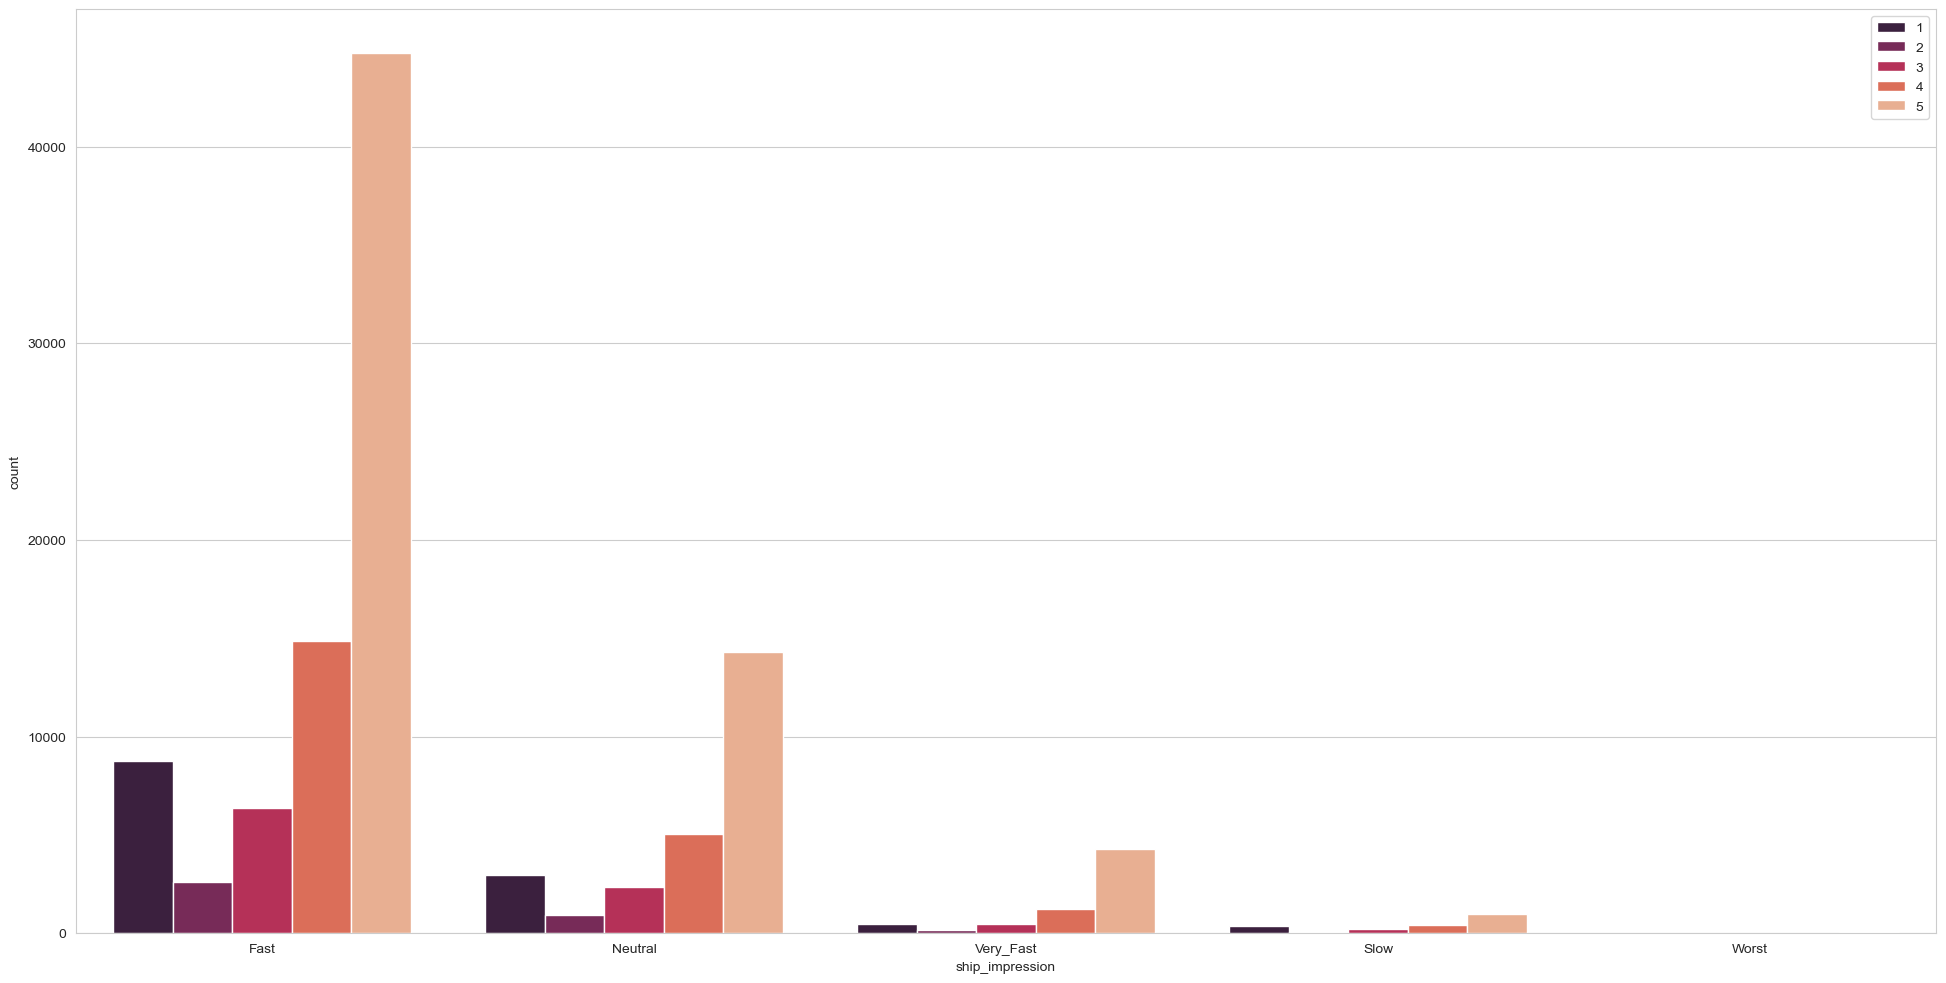

In [99]:
#Estimated Days histogram with review rating as hue
est_days = df.ship_impression.values.tolist()
review = df.review_score.values

fig = plt.figure(figsize=(24, 12))
sns.countplot(x='ship_impression', hue=review, data=df, palette='rocket')
plt.show()


**Pengamatan**


1. Mayoritas pesanan dikirim dalam kisaran Cepat yaitu 8-15 hari dalam waktu 2 minggu.

2. Pengamatan penting di sini adalah pelanggan lebih cenderung mendapatkan barang yang dikirim dalam 3 kategori teratas yaitu Cepat, Sangat Cepat, dan Netral. Dari mana mayoritas elemen telah menilai produk menjadi 5, beberapa 4 sementara sangat sedikit yang menilai kurang dari masing-masing 3 kasus.

3. Hari pengiriman merupakan fitur penting yang dapat ditambahkan.

4. Selain itu, memiliki fitur lain yaitu perkiraan tanggal pengiriman, jadi kami juga menambahkan fitur baru ke dataset yaitu perkiraan hari pengiriman. Hal ini dapat menjadi sesuatu yang berguna, karena tanggal ini ditampilkan terlebih dahulu kepada pengguna. Dalam fitur estimasi hari pengiriman, perusahaan menyebutkan hari maksimum yang dibutuhkan untuk mencapai tujuan.

5. Setelah mengamati histogram untuk estimasi_hari dengan rating sebagai hue, tren yang sama dari rating maksimum untuk semua kategori Cepat, Netral, dan lambat. Namun, kategori sangat cepat menjadi salah satu yang cukup sedikit.

# Feature Engineering for ID based features

In [17]:
from collections import Counter
#finding all those customers who have made multiple product purchases
order_counts = [k for k,v in Counter(df.customer_unique_id).items() if v > 1]
existing_cust = []
for i in df.customer_unique_id.values:
    if i in order_counts:
        existing_cust.append(1)
    else:
        existing_cust.append(0)
len(existing_cust)

111690

In [19]:
print('Jumlah pesanan yang dibuat dengan menggunakan pelanggan yang sudah ada / beberapa pesanan adalah  ',existing_cust.count(1))

Jumlah pesanan yang dibuat dengan menggunakan pelanggan yang sudah ada / beberapa pesanan adalah   34935


In [18]:
#seller popularity based on number of orders for each seller
max_value_count = df.seller_id.value_counts().max()
seller = df.seller_id.value_counts().to_dict()
seller_popularity = []
for _id in df.seller_id.values:
    seller_popularity.append(seller[_id])
df['seller_popularity'] = seller_popularity
df.shape

(111690, 32)

Karena dalam sebagian besar kasus, kode pos pelanggan dan penjual tidak cocok, jadi kami menghapus fitur ini

In [20]:
#dropping all id based features
df.drop(['customer_unique_id','seller_id','product_id','zipCode_prefix_seller','zipCode_prefix_cust'],axis=1,inplace=True)

#adding exisitng customer and seller_ID feature

df['existing_cust'] = existing_cust
df.shape

(111690, 28)

In [21]:
#if score> 3, set score = 1
#if score<=3, set score = 0
df.loc[df['review_score'] < 3 ,'Score'] = 0
df.loc[df['review_score'] > 3,'Score'] = 1
#removing neutral reviews
df.drop(df[df['review_score'] == 3].index,inplace=True)
df.drop('review_score',axis=1,inplace=True)
print(df.shape)

(102302, 28)


In [41]:
df.Score.value_counts()

1.000000    85948
0.000000    16354
Name: Score, dtype: int64

In [22]:
#removing the datetime features as we dont need them now
df.drop(['order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date','shipping_limit_date'],axis=1,inplace=True)

In [23]:
print(df.shape)
print('Final set of features are : ')
df.columns

(102302, 23)
Final set of features are : 


Index(['payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_city', 'customer_state', 'price',
       'freight_value', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'seller_state', 'product_category_name',
       'delivery_days', 'estimated_days', 'ships_in', 'arrival_time',
       'delivery_impression', 'estimated_del_impression', 'ship_impression',
       'seller_popularity', 'existing_cust', 'Score'],
      dtype='object')

**Summary**


* Data sangat tidak seimbang dengan sebagian besar review_score positif, hal ini dapat mempengaruhi model sehingga kita harus melakukan pemodelan data yang diperlukan untuk menangani hal ini.

* Dari analisis di atas, cukup meyakinkan bahwa review_score sangat bergantung pada waktu pengiriman, namun beberapa fitur lainnya juga berguna tetapi kita membutuhkan model yang sebenarnya untuk menentukan kepentingan fitur.

* Fitur lain seperti harga, panjang nama produk, panjang deskripsi dapat menjadi fitur yang sangat berguna, namun karena datanya tidak seimbang, maka tidak dapat dibuat dengan EDA yang sederhana.

* Kami telah menambahkan beberapa fitur lagi ke dalam dataset yang berhubungan dengan pengiriman dan pengiriman.

* Kami akan lebih ketat dalam hal sentimen dalam analisis ini dan menganggap netral atau (rating 3) sebagai hal yang negatif karena untuk rekomendasi produk, semakin ketat tolak ukurnya akan semakin baik.

* Rekayasa fitur yang dilakukan di sini mungkin tidak cukup untuk mendapatkan akurasi terbaik sehingga kami mungkin perlu melakukan beberapa rekayasa fitur lagi.

# Modelling

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler,Normalizer,OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import roc_curve,auc
import itertools
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [45]:
df.shape

(102302, 23)

In [25]:
#spliting data to train and test data
X = df.drop('Score',axis=1)
Y = df.Score.values

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.33,stratify=Y,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(68542, 22) (33760, 22) (68542,) (33760,)


### Normalisasi Kolom Numeric

In [26]:
std_scaler = Normalizer()
min_max = MinMaxScaler()

#payment_sequential feature
payment_sequential_train = std_scaler.fit_transform(X_train.payment_sequential.values.reshape(-1,1))
payment_sequential_test = std_scaler.transform(X_test.payment_sequential.values.reshape(-1,1))

#payment_installments feature
payment_installments_train = std_scaler.fit_transform(X_train.payment_installments.values.reshape(-1,1))
payment_installments_test = std_scaler.transform(X_test.payment_installments.values.reshape(-1,1))

#Payment value feature
payment_value_train = std_scaler.fit_transform(X_train.payment_value.values.reshape(-1,1))
payment_value_test = std_scaler.transform(X_test.payment_value.values.reshape(-1,1))


#price
price_train = std_scaler.fit_transform(X_train.price.values.reshape(-1,1))
price_test = std_scaler.transform(X_test.price.values.reshape(-1,1))

#freight_value
freight_value_train = std_scaler.fit_transform(X_train.freight_value.values.reshape(-1,1))
freight_value_test = std_scaler.transform(X_test.freight_value.values.reshape(-1,1))

#product_name_length
product_name_length_train = std_scaler.fit_transform(X_train.product_name_lenght.values.reshape(-1,1))
product_name_length_test = std_scaler.transform(X_test.product_name_lenght.values.reshape(-1,1))


#product_description_length
product_description_length_train = std_scaler.fit_transform(X_train.product_description_lenght.values.reshape(-1,1))
product_description_length_test = std_scaler.transform(X_test.product_description_lenght.values.reshape(-1,1))


#product_photos_qty
product_photos_qty_train = std_scaler.fit_transform(X_train.product_photos_qty.values.reshape(-1,1))
product_photos_qty_test = std_scaler.transform(X_test.product_photos_qty.values.reshape(-1,1))


#delivery_days
delivery_days_train = std_scaler.fit_transform(X_train.delivery_days.values.reshape(-1,1))
delivery_days_test = std_scaler.transform(X_test.delivery_days.values.reshape(-1,1))


#estimated_days
estimated_days_train = std_scaler.fit_transform(X_train.estimated_days.values.reshape(-1,1))
estimated_days_test = std_scaler.transform(X_test.estimated_days.values.reshape(-1,1))


#ships_in
ships_in_train = std_scaler.fit_transform(X_train.ships_in.values.reshape(-1,1))
ships_in_test = std_scaler.transform(X_test.ships_in.values.reshape(-1,1))

#seller_popularity
seller_popularity_train = min_max.fit_transform(X_train.seller_popularity.values.reshape(-1,1))
seller_popularity_test = min_max.transform(X_test.seller_popularity.values.reshape(-1,1))

### Normalisasi Kolom Categorical

In [27]:
#initialising oneHotEncoder

onehot = CountVectorizer()
cat = OneHotEncoder()
#payment_type
payment_type_train = onehot.fit_transform(X_train.payment_type.values)
payment_type_test = onehot.transform(X_test.payment_type.values)


#customer_state
customer_state_train = onehot.fit_transform(X_train.customer_state.values)
customer_state_test = onehot.transform(X_test.customer_state.values)

#seller_state
seller_state_train = onehot.fit_transform(X_train.seller_state.values)
seller_state_test = onehot.transform(X_test.seller_state.values)


#product_category_name
product_category_name_train = onehot.fit_transform(X_train.product_category_name.values)
product_category_name_test = onehot.transform(X_test.product_category_name.values)


#arrival_time
arrival_time_train = onehot.fit_transform(X_train.arrival_time.values)
arrival_time_test = onehot.transform(X_test.arrival_time.values)

#delivery_impression
delivery_impression_train = onehot.fit_transform(X_train.delivery_impression.values)
delivery_impression_test = onehot.transform(X_test.delivery_impression.values)


#estimated_del_impression
estimated_del_impression_train = onehot.fit_transform(X_train.estimated_del_impression.values)
estimated_del_impression_test = onehot.transform(X_test.estimated_del_impression.values)

#ship_impression
ship_impression_train = onehot.fit_transform(X_train.ship_impression.values)
ship_impression_test = onehot.transform(X_test.ship_impression.values)


#existing_cust
existing_cust_train = cat.fit_transform(X_train.existing_cust.values.reshape(-1,1))
existing_cust_test = cat.transform(X_test.existing_cust.values.reshape(-1,1))

In [28]:
#stacking up all the encoded features
X_train_vec = hstack((payment_sequential_train,payment_installments_train,payment_value_train,price_train,
                      freight_value_train,product_name_length_train,product_description_length_train,
                      product_photos_qty_train,delivery_days_train,estimated_days_train,ships_in_train,
                      payment_type_train,customer_state_train,seller_state_train,product_category_name_train,
                      arrival_time_train,delivery_impression_train,estimated_del_impression_train,
                     ship_impression_train,seller_popularity_train))

X_test_vec = hstack((payment_sequential_test,payment_installments_test,payment_value_test,price_test,
                      freight_value_test,product_name_length_test,product_description_length_test,
                      product_photos_qty_test,delivery_days_test,estimated_days_test,ships_in_test,
                      payment_type_test,customer_state_test,seller_state_test,product_category_name_test,
                      arrival_time_test,delivery_impression_test,estimated_del_impression_test,
                     ship_impression_test,seller_popularity_test))

print(X_train_vec.shape,X_test_vec.shape)

(68542, 153) (33760, 153)


## Naive Bayes

#### Hyper Parameter Tuning

In [40]:
naive = MultinomialNB(class_prior=[0.5,0.5])

param = {'alpha': [0.0001,0.001,0.01,0.1,1,10,100,1000]}

NB = GridSearchCV(naive,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
NB.fit(X_train_vec,y_train)
NB.best_params_

{'alpha': 0.1}

#### Fitting The Model

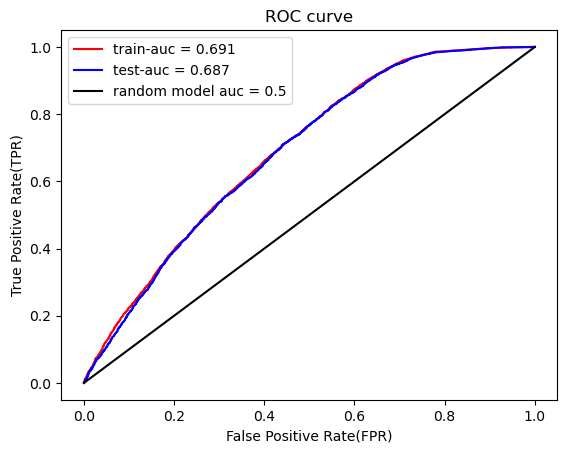

Best AUC for the model is 0.687 


In [41]:
clf = MultinomialNB(alpha=0.1,class_prior=[0.5,0.5])
clf.fit(X_train_vec,y_train)

#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

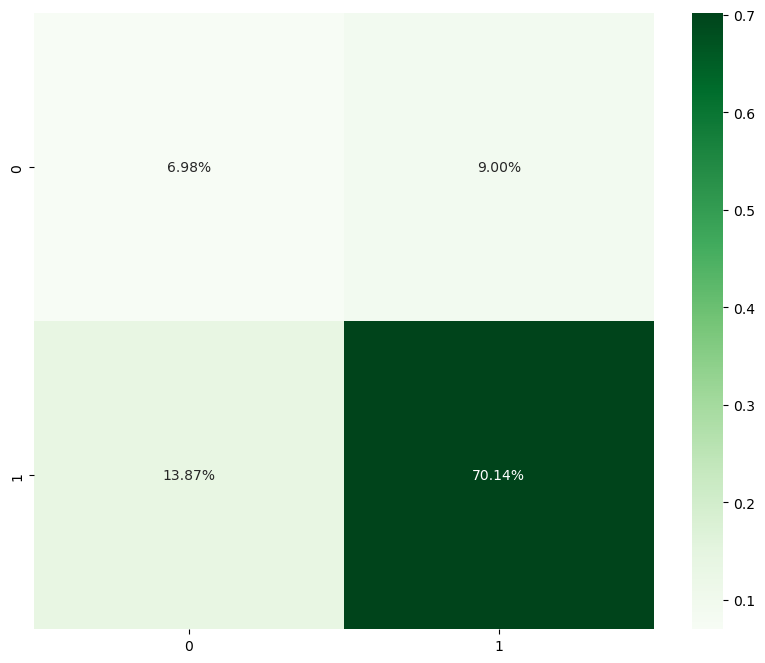

In [42]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [43]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.86
Test F1_score for this model is :  0.8598


In [44]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.7717
Test Accuracy score for this model :  0.7713


**Pengamatan**

1. Naive bayes memiliki kinerja yang cukup baik dalam hal overfitting minimal pada performa pelatihan dan pengujian.
2. Nilai f1 pada latih dan uji coba adalah 0.86 dan akurasi 77%.
3. Tetapi matriks kebingungan mengatakan bahwa ia telah salah mengklasifikasikan banyak poin sebagai False Positive.
4. Skor AUC untuk data uji adalah 0,694.

## Logistic Regression

#### Hyper Parameter Tuning

In [33]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'sag', 'saga', 'newton-cg', 'lbfgs']}

# Create a LogisticRegression object
log = LogisticRegression()

# Create a GridSearchCV object
clf = GridSearchCV(log, param_grid, cv=3)

# Fit the GridSearchCV object to the data
clf.fit(X_train_vec,y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", clf.best_params_)

Best hyperparameters:  {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


**CATATAN**

* Untuk pengukuran kinerja, kami tidak akan menggunakan akurasi sebagai metrik karena kumpulan data sangat tidak seimbang.
* Kami akan menggunakan skor AUC dan skor f1 sebagai metrik kinerja.

In [34]:
#model
clf = LogisticRegression(C= 0.01, penalty= 'l1', solver= 'liblinear')
clf.fit(X_train_vec,y_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

#### Fitting The Model

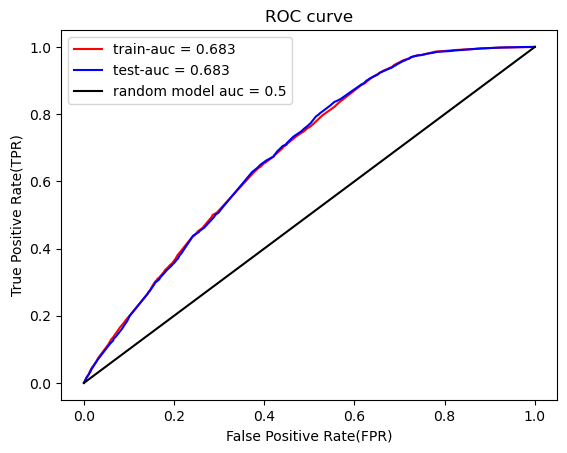

Best AUC for the model is 0.683 


In [35]:
#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

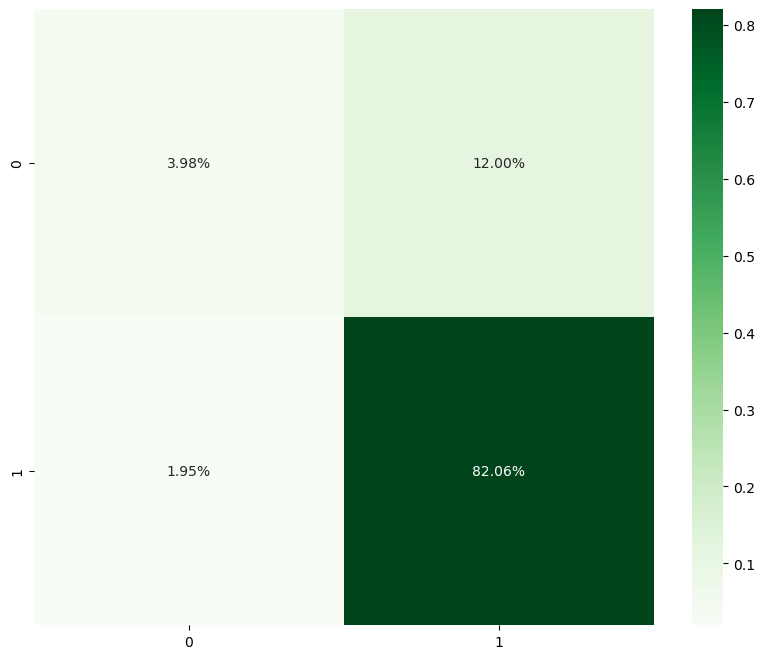

In [36]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [37]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.9218
Test F1_score for this model is :  0.9216


In [38]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.8607
Test Accuracy score for this model :  0.8605


**Pengamatan**

1. Regresi logistik berkinerja jauh lebih baik daripada Naive bayes dalam hal nilai f1, namun nilai AUC hampir sama.
2. Misklasifikasi positif palsu berkurang yang menghasilkan peningkatan skor f1 sebesar 92%.
3. Akurasi adalah 86% untuk train dan test yang menunjukkan bahwa model tidak overfit sama sekali.

## Random Forest

#### Hypeparameter Tuning

In [45]:
#param grid
#we have limit max_depth to 10 so that the model doesn't overfit
param = { 'min_samples_split':[5,10,30,50,100],'max_depth':[5,7,10]}

#Random forest classifier
RFclf = RandomForestClassifier(class_weight='balanced')

#using grid search cv to tune parameters
RF = GridSearchCV(RFclf,param,cv=5,refit=False,n_jobs=-1,verbose=1,return_train_score=True,scoring='roc_auc')
RF.fit(X_train_vec,y_train)
RF.best_params_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10],
                         'min_samples_split': [5, 10, 30, 50, 100]},
             refit=False, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [46]:
RF.best_params_

{'max_depth': 10, 'min_samples_split': 5}

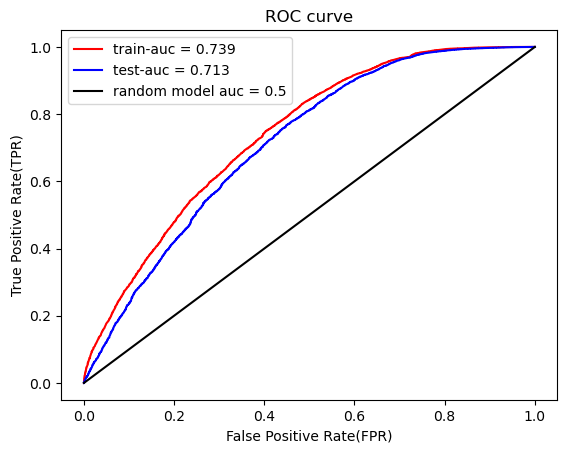

Best AUC for the model is 0.713 


In [47]:
#model
clf = RandomForestClassifier(class_weight='balanced',max_depth=10,min_samples_split=5)
clf.fit(X_train_vec,y_train)


#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

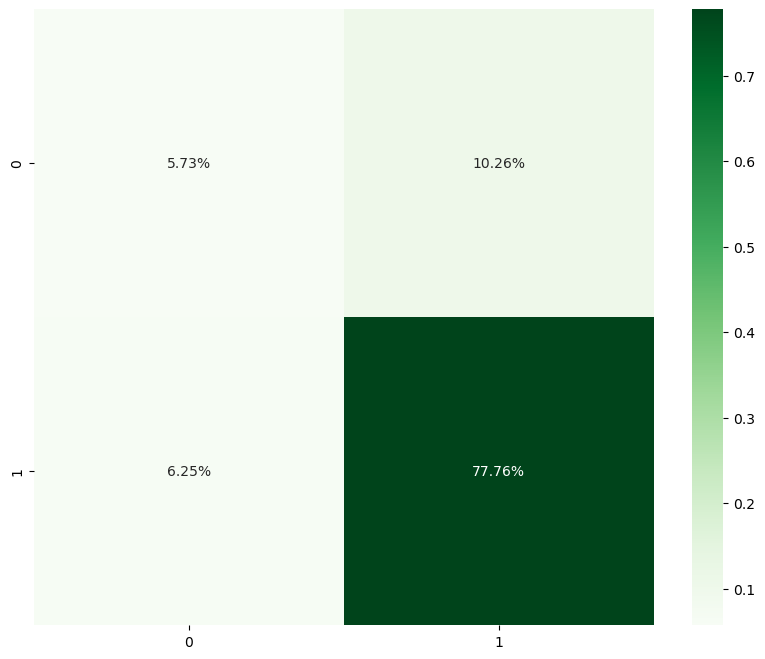

In [48]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [52]:
from sklearn.metrics import classification_report

In [49]:
#f1 score
print('Train F1 score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1 score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.9072
Test F1_score for this model is :  0.904


In [59]:
#f1 score
print('Train precision score for this model is : ',round(precision_score(y_train,pred_label_train),4))
print('Test precision score for this model is : ',round(precision_score(y_test,pred_label_test),4))

Train precision score for this model is :  0.8861
Test precision score for this model is :  0.8834


In [60]:
#f1 score
print('Train recall score for this model is : ',round(recall_score(y_train,pred_label_train),4))
print('Test recall score for this model is : ',round(recall_score(y_test,pred_label_test),4))

Train recall score for this model is :  0.9293
Test recall score for this model is :  0.9256


In [50]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.8402
Test Accuracy score for this model :  0.8349


**Pengamatan**

1. Random forest memiliki performa yang lebih baik daripada regresi logistik dalam hal nilai f1 dan akurasi.
2. Ini memberikan nilai f1 sebesar 90,13% dan tampaknya tidak overfit.
3. Tingkat misklasifikasi masih tidak terlalu besar.
4. Skor AUC adalah 0,713
5. Skor akurasi adalah 83%.

## XGBoost

In [43]:
from xgboost import XGBClassifier

### Hyperparameter Tuning 

In [40]:
#param grid
#we have limit max_depth to 8 so that the model doesn't overfit
param = { 'n_estimators': [10, 25, 40]}

XGB = XGBClassifier()

clf = GridSearchCV(XGB,param,cv=5,refit=False,return_train_score=True,scoring='roc_auc')
clf.fit(X_train_vec,y_train)
clf.best_params_

{'n_estimators': 40}

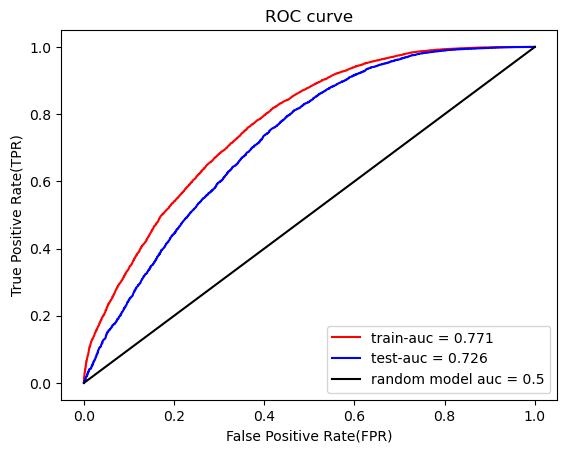

Best AUC for the model is 0.726 


In [45]:
clf =XGBClassifier(n_estimators=40)
clf.fit(X_train_vec,y_train)

y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

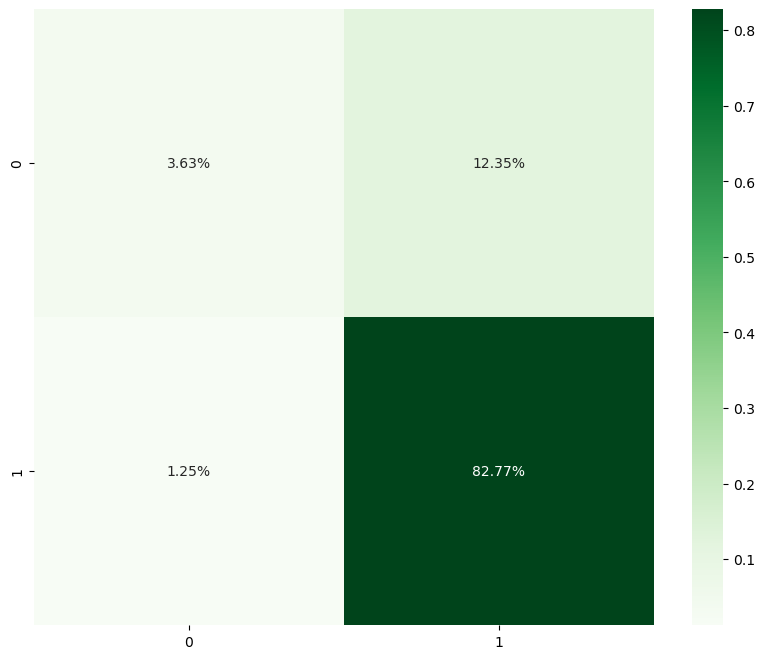

In [46]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [47]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.9269
Test F1_score for this model is :  0.9241


In [48]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.8691
Test Accuracy score for this model :  0.864


**Pengamatan**

1. XGBoost menghasilkan nilai f1 terbaik sebesar 0.9241 dan nilai auc sebesar 0.726.
2. Misklasifikasi False Positif dan True negetif juga berkurang menjadi 12% dan juga tingkat true positive menjadi 83%.
3. Nilai akurasi sebesar 87% untuk data uji dan 86% untuk data latih.

## GBDT

#### Hyperparameter Tuning

In [30]:
#param grid
#we have limit max_depth to 8 so that the model doesn't overfit
param = { 'min_samples_split' : [5,10,30,50],'max_depth' : [3,5,7,8]}

GBDTclf = GradientBoostingClassifier()

clf = GridSearchCV(GBDTclf,param,cv=5,refit=False,return_train_score=True,scoring='roc_auc')
clf.fit(X_train_vec,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5, 7, 8],
                         'min_samples_split': [5, 10, 30, 50]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [31]:
clf.best_params_

{'max_depth': 8, 'min_samples_split': 5}

In [32]:
import pickle

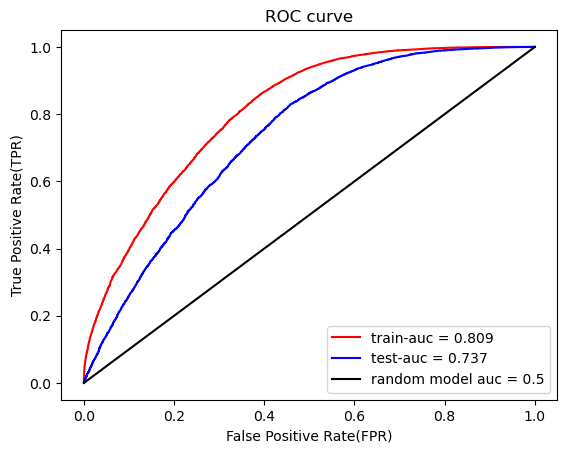

Best AUC for the model is 0.737 


In [35]:
#Model
clf = GradientBoostingClassifier(max_depth=8,min_samples_split=5)
clf.fit(X_train_vec,y_train)

# save the model to disk
Pkl_Filename = "final_model.pkl"
with open(Pkl_Filename, 'wb') as file:
    pickle.dump(clf, file)

#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))#Model



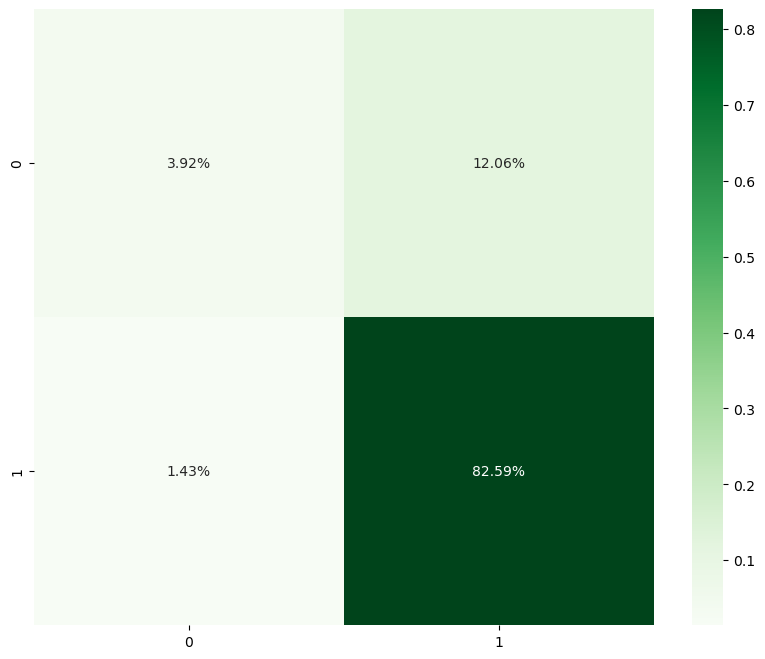

In [36]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [37]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.9319
Test F1_score for this model is :  0.9245


In [38]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.8784
Test Accuracy score for this model :  0.8651


**Pengamatan**

1. Pengklasifikasi Gradient Boosted menghasilkan nilai f1 terbaik sebesar 0.9243 dan nilai auc sebesar 0.745.
2. Misklasifikasi False Positif dan True negetif juga berkurang menjadi 11% dan juga tingkat true positive menjadi 83%.
3. Nilai akurasi sebesar 86% untuk data uji dan 88% untuk data latih.

## Summary

1. GBDT berkinerja lebih baik dibandingkan dengan model lainnya dalam hal semua metrik kinerja.
2. Regresi logistik memiliki kinerja yang hampir sama dengan GBDT, tetapi GBDT lebih kuat terhadap outlier.
3. Prediksi peringkat tidak terlalu bergantung secara langsung pada sebagian besar fitur, sehingga kinerjanya tidak mencapai puncaknya.
4. Menggunakan skor f1 dan accuracy sebagai metrik kinerja utama .
5. Setiap model berkinerja lebih baik setelah kami menghapus skor ulasan netral dari data.